This script reads the Nc file for Mosart Discharge downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

path2Create = r'C:/rezaul/1.academic/1.research/2.project/mrb/output/'
 
if not os.path.exists(path2Create):
    os.makedirs(path2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/output/fig/disch/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(path2Save)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

In [2]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [3]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [4]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [5]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package


In [6]:
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package
sf=shp.Reader('C:/rezaul/1.academic/1.research/1.data/shapeFile/missi/Miss_RiverBasin.shp')

## Basin shape files

In [7]:
shapeFile_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/mississippi_1.shp'
shapeFile_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/arkansas_basin_1.shp'
shapeFile_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/missouri_basin_1.shp'
shapeFile_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mississippi_basins/mississippi_basins/ohio_basin_1.shp'


In [8]:
sf_Missi = shp.Reader(shapeFile_Missi)
sf_Arkansas = shp.Reader(shapeFile_Arkansas)
sf_Missouri = shp.Reader(shapeFile_Missouri)
sf_Ohio = shp.Reader(shapeFile_Ohio)

In [9]:
reader_Missi = shpreader.Reader(shapeFile_Missi)
basin_Missi = list(reader_Missi.geometries())
#
reader_Arkansas = shpreader.Reader(shapeFile_Arkansas)
basin_Arkansas = list(reader_Arkansas.geometries())
#
reader_Missouri = shpreader.Reader(shapeFile_Missouri)
basin_Missouri = list(reader_Missouri.geometries())
#
reader_Ohio = shpreader.Reader(shapeFile_Ohio)
basin_Ohio = list(reader_Ohio.geometries())
#

In [10]:
feature_Missi = sf_Missi.shapeRecords()[0]
print(feature_Missi)

feature_Arkansas = sf_Arkansas.shapeRecords()[0]
print(feature_Arkansas)

feature_Missouri = sf_Missouri.shapeRecords()[0]
print(feature_Missouri)

feature_Ohio = sf_Ohio.shapeRecords()[0]
print(feature_Ohio)

#feature_LowMissi = sf_LowMissi.shapeRecords()[0]
#print(feature_LowMissi)


## Read Nc file

In [11]:
filePath = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon'
fileName = 'b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc'

ncFile_param = str(filePath) + '/' + str(fileName)
print(ncFile_param)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.PRECT.185001-185912.nc


In [12]:
file_param = Dataset(ncFile_param, mode='r')
file_param

lons = file_param.variables['lon'][:]
lats = file_param.variables['lat'][:]

In [13]:
print(lats[0:4])

[-90.         -89.05759162 -88.11518325 -87.17277487]


In [14]:
print(lons[0:4])

[0.   1.25 2.5  3.75]


In [15]:
file_xr  = xr.open_dataset(ncFile_param) 
file_xr

C:\Users\muham\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'rasterio' loading failed:
DLL load failed while importing _base: The specified procedure could not be found.
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33,
                   time: 120)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 ...
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) float64 ...
    PRECT         (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    logname:           sunseon
    host:              mom1
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1001-01-...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [16]:
param_val = file_xr['PRECT']
print(param_val.shape)
print(param_val)

(120, 192, 288)
<xarray.DataArray 'PRECT' (time: 120, lat: 192, lon: 288)>
[6635520 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 1860-01-01 00:00:00
Attributes:
    units:         m/s
    long_name:     Total (convective and large-scale) precipitation rate (liq...
    cell_methods:  time: mean


In [17]:

file_paramHist = Dataset(ncFile_param, mode='r')
file_paramHist

lons = file_paramHist.variables['lon'][:]
lats = file_paramHist.variables['lat'][:]
times = file_paramHist.variables['time'][:]
ntim = times.shape[0]
print(ntim)

time = np.arange(ntim)
time

param_valHist = file_paramHist.variables['PRECT'][:]*86400*30  

print(param_valHist.shape)
print('')

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    
    

120
(120, 192, 288)



## Setting US boundaries

In [18]:
# Save only U.S. 
latboundsUs = [ 25 , 55]
lonboundsUs = [230 , 300]

In [19]:
# latitude lower and upper index
latli = np.argmin( np.abs( lats - latboundsUs[0] ) )
latui = np.argmin( np.abs( lats - latboundsUs[1] ) ) 

# longitude lower and upper index
lonli = np.argmin( np.abs( lons - lonboundsUs[0] ) )
lonui = np.argmin( np.abs( lons - lonboundsUs[1] ) )  

In [20]:
print(latli, latui)


122 154


In [21]:
print(lonli, lonui)

184 240


In [22]:
param_val_sample_Us = param_val[:, latli:latui , lonli:lonui]
print(param_val_sample_Us.shape)

(120, 32, 56)


In [23]:
t,y_Us,x_Us = param_val_sample_Us.shape
print(y_Us)
print(x_Us)
print(t)

32
56
120


In [24]:
lats_Us = lats[latli:latui]
print(lats_Us)

[24.97382199 25.91623037 26.85863874 27.80104712 28.7434555  29.68586387
 30.62827225 31.57068063 32.51308901 33.45549738 34.39790576 35.34031414
 36.28272251 37.22513089 38.16753927 39.10994764 40.05235602 40.9947644
 41.93717277 42.87958115 43.82198953 44.76439791 45.70680628 46.64921466
 47.59162304 48.53403141 49.47643979 50.41884817 51.36125654 52.30366492
 53.2460733  54.18848168]


In [25]:
lons_Us = lons[lonli:lonui]
print(lons_Us)

[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


## Using data from Ensemble Members

### Lat Lon info from CESM2

In [26]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/latsUsArr.npy'
latUs_cesm2 = np.load(file_LatUs)
print(latUs_cesm2.shape)
print(latUs_cesm2)

(32,)
[24.973822 25.916231 26.858639 27.801046 28.743456 29.685863 30.628273
 31.57068  32.51309  33.455498 34.397907 35.340313 36.282722 37.225132
 38.167538 39.109947 40.052357 40.994766 41.937172 42.87958  43.82199
 44.764397 45.706806 46.649216 47.59162  48.53403  49.47644  50.41885
 51.361256 52.303665 53.246075 54.18848 ]


In [27]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/CESM2_FLOOD/sm/lonsUsArr.npy'
lonUs_cesm2 = np.load(file_LonUs)
print(lonUs_cesm2.shape)
print(lonUs_cesm2)

(56,)
[230.   231.25 232.5  233.75 235.   236.25 237.5  238.75 240.   241.25
 242.5  243.75 245.   246.25 247.5  248.75 250.   251.25 252.5  253.75
 255.   256.25 257.5  258.75 260.   261.25 262.5  263.75 265.   266.25
 267.5  268.75 270.   271.25 272.5  273.75 275.   276.25 277.5  278.75
 280.   281.25 282.5  283.75 285.   286.25 287.5  288.75 290.   291.25
 292.5  293.75 295.   296.25 297.5  298.75]


### Historical (1850-2014): 1980 months

In [28]:
file_hist_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsHistEnsMems.npy'
file_hist_ensMems_loaded = np.load(file_hist_ensMems)
print(file_hist_ensMems_loaded.shape)
maxVal = np.nanmax(file_hist_ensMems_loaded)
maxVal

(1980, 32, 56, 50)


1416.2439802021254

## Historical years and 3 time periods (i.e., Era) in Scenario years

In [29]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


In [30]:
histYrSt = 1850
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [31]:
refPeriodStepSt = (histYrSelSt - histYrSt)*nMonsPerYr
print(refPeriodStepSt)

960


In [32]:
file_histSel_ensMems_loaded = file_hist_ensMems_loaded[refPeriodStepSt::, :, :, :]

print(file_histSel_ensMems_loaded.shape)

(1020, 32, 56, 50)


### Scenario (2015-2100)

In [33]:
file_scen_ensMems = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/precip/mon/monPrecipUsScenEnsMems.npy'
file_scen_ensMems_loaded = np.load(file_scen_ensMems)
print(file_scen_ensMems_loaded.shape)
maxVal = np.nanmax(file_scen_ensMems_loaded)
maxVal

(1032, 32, 56, 50)


1645.1687024527928

## Concatenate two data arrays

In [34]:
print(file_histSel_ensMems_loaded.shape)
print(file_scen_ensMems_loaded.shape)


(1020, 32, 56, 50)
(1032, 32, 56, 50)


In [35]:
param_histSel_scen_ensMems_Us = np.concatenate((file_histSel_ensMems_loaded, file_scen_ensMems_loaded), axis=0)
print(param_histSel_scen_ensMems_Us.shape)

(2052, 32, 56, 50)


## Writing in an Xarray Data array

In [36]:
print(param_histSel_scen_ensMems_Us.shape)

(2052, 32, 56, 50)


In [37]:
t_histSel_scen, y_Us, x_Us, ens_size = param_histSel_scen_ensMems_Us.shape

print(t_histSel_scen)
print(y_Us)
print(x_Us)
print(ens_size)

2052
32
56
50


In [38]:
Month_steps = [x for x in range(t_histSel_scen)]
#print(Month_steps)

In [39]:
Ensembles = [x for x in range(ens_size)]
print(Ensembles)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [40]:
param_histSel_scen_ensMems_Us_xarray = xr.DataArray(param_histSel_scen_ensMems_Us, coords=[Month_steps, latUs_cesm2, lonUs_cesm2, Ensembles], dims=["Month_steps","Lat","Lon","Ensembles"])

print(param_histSel_scen_ensMems_Us_xarray.shape)
#print(param_histSel_scen_ensMems_Us_xarray)

(2052, 32, 56, 50)


## Masking files for the US Domain only

### Mississippi

In [41]:
MaskFile_Missi_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc'
print(MaskFile_Missi_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missiWri_us_CESM_longThree.nc


In [42]:
MaskFile_Missi = xr.open_dataset(MaskFile_Missi_to_load)['Mask']
print(MaskFile_Missi)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [43]:
param_masked_Missi = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Missi>0)
print(param_masked_Missi.shape)
#print(param_masked_Missi)

(2052, 32, 56, 50)


### Missouri

In [44]:
MaskFile_Missouri_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc'
print(MaskFile_Missouri_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_missouri_us_CESM_longThree.nc


In [45]:
MaskFile_Missouri = xr.open_dataset(MaskFile_Missouri_to_load)['Mask']
print(MaskFile_Missouri)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [46]:
param_masked_Missouri = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Missouri>0)
print(param_masked_Missouri.shape)
#print(param_masked_Missouri)

(2052, 32, 56, 50)


### Arkansas

In [47]:
MaskFile_Arkansas_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc'
print(MaskFile_Arkansas_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_arkansas_us_CESM_longThree.nc


In [48]:
MaskFile_Arkansas = xr.open_dataset(MaskFile_Arkansas_to_load)['Mask']
print(MaskFile_Arkansas)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [49]:
param_masked_Arkansas = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Arkansas>0)
print(param_masked_Arkansas.shape)
#print(param_masked_Arkansas)

(2052, 32, 56, 50)


### Ohio

In [50]:
MaskFile_Ohio_to_load = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc'
print(MaskFile_Ohio_to_load)

C:/rezaul/1.academic/1.research/2.project/mrb/dt/shapeFile/mask/mrb_us/mask_ohio_us_CESM_longThree.nc


In [51]:
MaskFile_Ohio = xr.open_dataset(MaskFile_Ohio_to_load)['Mask']
print(MaskFile_Ohio)

<xarray.DataArray 'Mask' (Lat: 32, Lon: 56)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * Lat      (Lat) float32 24.97 25.92 26.86 27.8 ... 51.36 52.3 53.25 54.19
  * Lon      (Lon) float32 230.0 231.2 232.5 233.8 ... 295.0 296.2 297.5 298.8


In [52]:
param_masked_Ohio = param_histSel_scen_ensMems_Us_xarray.where(MaskFile_Ohio>0)
print(param_masked_Ohio.shape)
#print(param_masked_Ohio)

(2052, 32, 56, 50)


### Lower Mississippi River Basin

In [53]:
print(param_histSel_scen_ensMems_Us_xarray.shape)

(2052, 32, 56, 50)


In [54]:
param_masked_lowMissi = param_histSel_scen_ensMems_Us_xarray.sel(Lat=slice(30.,37.), Lon = slice(268., 271.))
print(param_masked_lowMissi.shape)

(2052, 7, 2, 50)


In [55]:
param_masked_ensMean_lowMissi = np.nanmean(param_masked_lowMissi, axis = 3)
print(param_masked_ensMean_lowMissi.shape)

(2052, 7, 2)


In [56]:
param_masked_ensMean_basinAvg_lowMissi = np.nanmean(param_masked_ensMean_lowMissi, axis=(1,2))
print(param_masked_ensMean_basinAvg_lowMissi.shape)

(2052,)


## The masked rasters for different basins

In [57]:
print(param_masked_Missi.shape)
print(param_masked_Missouri.shape)
print(param_masked_Arkansas.shape)
print(param_masked_Ohio.shape)
print('')
print(param_masked_lowMissi.shape)

(2052, 32, 56, 50)
(2052, 32, 56, 50)
(2052, 32, 56, 50)
(2052, 32, 56, 50)

(2052, 7, 2, 50)


## Time series for basin-average Param value: Monthly resolution

In [58]:
param_masked_ensMem_basinAvg_Missi = np.nanmean(param_masked_Missi, axis=(1,2))
print(param_masked_ensMem_basinAvg_Missi.shape)

(2052, 50)


In [59]:
param_masked_ensMem_basinAvg_Missouri = np.nanmean(param_masked_Missouri, axis=(1,2))
print(param_masked_ensMem_basinAvg_Missouri.shape)

(2052, 50)


In [60]:
param_masked_ensMem_basinAvg_Arkansas = np.nanmean(param_masked_Arkansas, axis=(1,2))
print(param_masked_ensMem_basinAvg_Arkansas.shape)

(2052, 50)


In [61]:
param_masked_ensMem_basinAvg_Ohio = np.nanmean(param_masked_Ohio, axis=(1,2))
print(param_masked_ensMem_basinAvg_Ohio.shape)

(2052, 50)


In [62]:
param_masked_ensMem_basinAvg_lowMissi = np.nanmean(param_masked_lowMissi, axis=(1,2))
print(param_masked_ensMem_basinAvg_lowMissi.shape)

(2052, 50)


## Ensemble Mean

In [63]:
param_masked_ensMean_basinAvg_Missi = np.nanmean(param_masked_ensMem_basinAvg_Missi, axis =1)
print(param_masked_ensMean_basinAvg_Missi.shape)
print(param_masked_ensMean_basinAvg_Missi)


(2052,)
[51.54646862 51.66520934 58.95606332 ... 50.779775   64.75033688
 66.51196693]


In [64]:
param_masked_ensMean_basinAvg_Missouri = np.nanmean(param_masked_ensMem_basinAvg_Missouri, axis =1)
print(param_masked_ensMean_basinAvg_Missouri.shape)
print(param_masked_ensMean_basinAvg_Missouri)


(2052,)
[27.34115757 27.44920615 33.53488854 ... 34.78054992 39.22076002
 35.3271365 ]


In [65]:
param_masked_ensMean_basinAvg_Arkansas = np.nanmean(param_masked_ensMem_basinAvg_Arkansas, axis =1)
print(param_masked_ensMean_basinAvg_Arkansas.shape)
print(param_masked_ensMean_basinAvg_Arkansas)


(2052,)
[45.77816042 52.8953356  55.01010673 ... 47.09226295 53.07093668
 52.98572102]


In [66]:
param_masked_ensMean_basinAvg_Ohio = np.nanmean(param_masked_ensMem_basinAvg_Ohio, axis =1)
print(param_masked_ensMean_basinAvg_Ohio.shape)
print(param_masked_ensMean_basinAvg_Ohio)


(2052,)
[109.6756834   99.40381857 115.74808547 ...  79.50836331 129.52854612
 144.10041449]


In [67]:
param_masked_ensMean_basinAvg_lowMissi = np.nanmean(param_masked_ensMem_basinAvg_lowMissi, axis =1)
print(param_masked_ensMean_basinAvg_lowMissi.shape)
print(param_masked_ensMean_basinAvg_lowMissi)


(2052,)
[106.76868651 106.61268857 118.55483639 ...  76.12450022 112.37746711
 131.90343644]


## Divide the time series into 4 Eras

### The four time slots

In [68]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [69]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


## Reference Period

In [70]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*nMonsPerYr

refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*nMonsPerYr
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

492 852
360


## Era 1

In [71]:
scenEraOneStepSt = (scenYrSt - histYrSelSt)*nMonsPerYr
scenEraOneStepEnd = (scenEraTwoYrSt - histYrSelSt)*nMonsPerYr

print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

1020 1380
360


## Era 2

In [72]:
scenEraTwoStepSt = (scenEraTwoYrSt - histYrSelSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraThreeYrSt - histYrSelSt)*nMonsPerYr

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

1380 1740
360


## Era 3

In [73]:
scenEraThreeStepSt = (scenEraThreeYrSt - histYrSelSt)*12
scenEraThreeStepEnd = (scenYrEnd - histYrSelSt + 1)*12

print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

1740 2052
312


### The Precip files for the sub-basins

In [74]:
print(param_masked_ensMean_basinAvg_Missi.shape)
print(param_masked_ensMean_basinAvg_Missouri.shape)
print(param_masked_ensMean_basinAvg_Arkansas.shape)
print(param_masked_ensMean_basinAvg_Ohio.shape)
print(param_masked_ensMean_basinAvg_lowMissi.shape)


(2052,)
(2052,)
(2052,)
(2052,)
(2052,)


### Mississippi at the 4 Eras

In [75]:
precip_refPeriod_ensMean_mon_Missi = param_masked_ensMean_basinAvg_Missi[refPeriodStepSt:refPeriodStepEnd]
print(precip_refPeriod_ensMean_mon_Missi.shape)

precip_refPeriod_ensMean_mon_reshape_Missi=np.reshape(precip_refPeriod_ensMean_mon_Missi,(30,12))
print(precip_refPeriod_ensMean_mon_reshape_Missi.shape)

precip_refPeriod_ensMean_mon_clim_Missi = np.nanmean(precip_refPeriod_ensMean_mon_reshape_Missi, axis = 0)
print(precip_refPeriod_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [76]:
precip_scenEraOne_ensMean_mon_Missi = param_masked_ensMean_basinAvg_Missi[scenEraOneStepSt:scenEraOneStepEnd]
print(precip_scenEraOne_ensMean_mon_Missi.shape)

precip_scenEraOne_ensMean_mon_reshape_Missi=np.reshape(precip_scenEraOne_ensMean_mon_Missi,(30,12))
print(precip_scenEraOne_ensMean_mon_reshape_Missi.shape)

precip_scenEraOne_ensMean_mon_clim_Missi = np.nanmean(precip_scenEraOne_ensMean_mon_reshape_Missi, axis = 0)
print(precip_scenEraOne_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [77]:
precip_scenEraTwo_ensMean_mon_Missi = param_masked_ensMean_basinAvg_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(precip_scenEraTwo_ensMean_mon_Missi.shape)

precip_scenEraTwo_ensMean_mon_reshape_Missi=np.reshape(precip_scenEraTwo_ensMean_mon_Missi,(30,12))
print(precip_scenEraTwo_ensMean_mon_reshape_Missi.shape)

precip_scenEraTwo_ensMean_mon_clim_Missi = np.nanmean(precip_scenEraTwo_ensMean_mon_reshape_Missi, axis = 0)
print(precip_scenEraTwo_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [78]:
precip_scenEraThree_ensMean_mon_Missi = param_masked_ensMean_basinAvg_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(precip_scenEraThree_ensMean_mon_Missi.shape)

precip_scenEraThree_ensMean_mon_reshape_Missi=np.reshape(precip_scenEraThree_ensMean_mon_Missi,(26,12))
print(precip_scenEraThree_ensMean_mon_reshape_Missi.shape)

precip_scenEraThree_ensMean_mon_clim_Missi = np.nanmean(precip_scenEraThree_ensMean_mon_reshape_Missi, axis = 0)
print(precip_scenEraThree_ensMean_mon_clim_Missi.shape)


(312,)
(26, 12)
(12,)


### Missouri at the 4 Eras

In [79]:
precip_refPeriod_ensMean_mon_Missouri = param_masked_ensMean_basinAvg_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(precip_refPeriod_ensMean_mon_Missouri.shape)

precip_refPeriod_ensMean_mon_reshape_Missouri=np.reshape(precip_refPeriod_ensMean_mon_Missouri,(30,12))
print(precip_refPeriod_ensMean_mon_reshape_Missouri.shape)

precip_refPeriod_ensMean_mon_clim_Missouri = np.nanmean(precip_refPeriod_ensMean_mon_reshape_Missouri, axis = 0)
print(precip_refPeriod_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [80]:
precip_scenEraOne_ensMean_mon_Missouri = param_masked_ensMean_basinAvg_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(precip_scenEraOne_ensMean_mon_Missouri.shape)

precip_scenEraOne_ensMean_mon_reshape_Missouri=np.reshape(precip_scenEraOne_ensMean_mon_Missouri,(30,12))
print(precip_scenEraOne_ensMean_mon_reshape_Missouri.shape)

precip_scenEraOne_ensMean_mon_clim_Missouri = np.nanmean(precip_scenEraOne_ensMean_mon_reshape_Missouri, axis = 0)
print(precip_scenEraOne_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [81]:
precip_scenEraTwo_ensMean_mon_Missouri = param_masked_ensMean_basinAvg_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(precip_scenEraTwo_ensMean_mon_Missouri.shape)

precip_scenEraTwo_ensMean_mon_reshape_Missouri=np.reshape(precip_scenEraTwo_ensMean_mon_Missouri,(30,12))
print(precip_scenEraTwo_ensMean_mon_reshape_Missouri.shape)

precip_scenEraTwo_ensMean_mon_clim_Missouri = np.nanmean(precip_scenEraTwo_ensMean_mon_reshape_Missouri, axis = 0)
print(precip_scenEraTwo_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [82]:
precip_scenEraThree_ensMean_mon_Missouri = param_masked_ensMean_basinAvg_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(precip_scenEraThree_ensMean_mon_Missouri.shape)

precip_scenEraThree_ensMean_mon_reshape_Missouri=np.reshape(precip_scenEraThree_ensMean_mon_Missouri,(26,12))
print(precip_scenEraThree_ensMean_mon_reshape_Missouri.shape)

precip_scenEraThree_ensMean_mon_clim_Missouri = np.nanmean(precip_scenEraThree_ensMean_mon_reshape_Missouri, axis = 0)
print(precip_scenEraThree_ensMean_mon_clim_Missouri.shape)


(312,)
(26, 12)
(12,)


### Arkansas at the 4 Eras

In [83]:
precip_refPeriod_ensMean_mon_Arkansas = param_masked_ensMean_basinAvg_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(precip_refPeriod_ensMean_mon_Arkansas.shape)

precip_refPeriod_ensMean_mon_reshape_Arkansas=np.reshape(precip_refPeriod_ensMean_mon_Arkansas,(30,12))
print(precip_refPeriod_ensMean_mon_reshape_Arkansas.shape)

precip_refPeriod_ensMean_mon_clim_Arkansas = np.nanmean(precip_refPeriod_ensMean_mon_reshape_Arkansas, axis = 0)
print(precip_refPeriod_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [84]:
precip_scenEraOne_ensMean_mon_Arkansas = param_masked_ensMean_basinAvg_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(precip_scenEraOne_ensMean_mon_Arkansas.shape)

precip_scenEraOne_ensMean_mon_reshape_Arkansas=np.reshape(precip_scenEraOne_ensMean_mon_Arkansas,(30,12))
print(precip_scenEraOne_ensMean_mon_reshape_Arkansas.shape)

precip_scenEraOne_ensMean_mon_clim_Arkansas = np.nanmean(precip_scenEraOne_ensMean_mon_reshape_Arkansas, axis = 0)
print(precip_scenEraOne_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [85]:
precip_scenEraTwo_ensMean_mon_Arkansas = param_masked_ensMean_basinAvg_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(precip_scenEraTwo_ensMean_mon_Arkansas.shape)

precip_scenEraTwo_ensMean_mon_reshape_Arkansas=np.reshape(precip_scenEraTwo_ensMean_mon_Arkansas,(30,12))
print(precip_scenEraTwo_ensMean_mon_reshape_Arkansas.shape)

precip_scenEraTwo_ensMean_mon_clim_Arkansas = np.nanmean(precip_scenEraTwo_ensMean_mon_reshape_Arkansas, axis = 0)
print(precip_scenEraTwo_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [86]:
precip_scenEraThree_ensMean_mon_Arkansas = param_masked_ensMean_basinAvg_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(precip_scenEraThree_ensMean_mon_Arkansas.shape)

precip_scenEraThree_ensMean_mon_reshape_Arkansas=np.reshape(precip_scenEraThree_ensMean_mon_Arkansas,(26,12))
print(precip_scenEraThree_ensMean_mon_reshape_Arkansas.shape)

precip_scenEraThree_ensMean_mon_clim_Arkansas = np.nanmean(precip_scenEraThree_ensMean_mon_reshape_Arkansas, axis = 0)
print(precip_scenEraThree_ensMean_mon_clim_Arkansas.shape)


(312,)
(26, 12)
(12,)


### Ohio at the 4 Eras

In [87]:
precip_refPeriod_ensMean_mon_Ohio = param_masked_ensMean_basinAvg_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(precip_refPeriod_ensMean_mon_Ohio.shape)

precip_refPeriod_ensMean_mon_reshape_Ohio=np.reshape(precip_refPeriod_ensMean_mon_Ohio,(30,12))
print(precip_refPeriod_ensMean_mon_reshape_Ohio.shape)

precip_refPeriod_ensMean_mon_clim_Ohio = np.nanmean(precip_refPeriod_ensMean_mon_reshape_Ohio, axis = 0)
print(precip_refPeriod_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [88]:
precip_scenEraOne_ensMean_mon_Ohio = param_masked_ensMean_basinAvg_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(precip_scenEraOne_ensMean_mon_Ohio.shape)

precip_scenEraOne_ensMean_mon_reshape_Ohio=np.reshape(precip_scenEraOne_ensMean_mon_Ohio,(30,12))
print(precip_scenEraOne_ensMean_mon_reshape_Ohio.shape)

precip_scenEraOne_ensMean_mon_clim_Ohio = np.nanmean(precip_scenEraOne_ensMean_mon_reshape_Ohio, axis = 0)
print(precip_scenEraOne_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [89]:
precip_scenEraTwo_ensMean_mon_Ohio = param_masked_ensMean_basinAvg_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(precip_scenEraTwo_ensMean_mon_Ohio.shape)

precip_scenEraTwo_ensMean_mon_reshape_Ohio=np.reshape(precip_scenEraTwo_ensMean_mon_Ohio,(30,12))
print(precip_scenEraTwo_ensMean_mon_reshape_Ohio.shape)

precip_scenEraTwo_ensMean_mon_clim_Ohio = np.nanmean(precip_scenEraTwo_ensMean_mon_reshape_Ohio, axis = 0)
print(precip_scenEraTwo_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [90]:
precip_scenEraThree_ensMean_mon_Ohio = param_masked_ensMean_basinAvg_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(precip_scenEraThree_ensMean_mon_Ohio.shape)

precip_scenEraThree_ensMean_mon_reshape_Ohio=np.reshape(precip_scenEraThree_ensMean_mon_Ohio,(26,12))
print(precip_scenEraThree_ensMean_mon_reshape_Ohio.shape)

precip_scenEraThree_ensMean_mon_clim_Ohio = np.nanmean(precip_scenEraThree_ensMean_mon_reshape_Ohio, axis = 0)
print(precip_scenEraThree_ensMean_mon_clim_Ohio.shape)


(312,)
(26, 12)
(12,)


### Lower Mississippi at the 4 Eras


In [91]:
precip_refPeriod_ensMean_mon_lowMissi = param_masked_ensMean_basinAvg_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(precip_refPeriod_ensMean_mon_lowMissi.shape)

precip_refPeriod_ensMean_mon_reshape_lowMissi=np.reshape(precip_refPeriod_ensMean_mon_lowMissi,(30,12))
print(precip_refPeriod_ensMean_mon_reshape_lowMissi.shape)

precip_refPeriod_ensMean_mon_clim_lowMissi = np.nanmean(precip_refPeriod_ensMean_mon_reshape_lowMissi, axis = 0)
print(precip_refPeriod_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [92]:
precip_scenEraOne_ensMean_mon_lowMissi = param_masked_ensMean_basinAvg_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(precip_scenEraOne_ensMean_mon_lowMissi.shape)

precip_scenEraOne_ensMean_mon_reshape_lowMissi=np.reshape(precip_scenEraOne_ensMean_mon_lowMissi,(30,12))
print(precip_scenEraOne_ensMean_mon_reshape_lowMissi.shape)

precip_scenEraOne_ensMean_mon_clim_lowMissi = np.nanmean(precip_scenEraOne_ensMean_mon_reshape_lowMissi, axis = 0)
print(precip_scenEraOne_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [93]:
precip_scenEraTwo_ensMean_mon_lowMissi = param_masked_ensMean_basinAvg_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(precip_scenEraTwo_ensMean_mon_lowMissi.shape)

precip_scenEraTwo_ensMean_mon_reshape_lowMissi=np.reshape(precip_scenEraTwo_ensMean_mon_lowMissi,(30,12))
print(precip_scenEraTwo_ensMean_mon_reshape_lowMissi.shape)

precip_scenEraTwo_ensMean_mon_clim_lowMissi = np.nanmean(precip_scenEraTwo_ensMean_mon_reshape_lowMissi, axis = 0)
print(precip_scenEraTwo_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [94]:
precip_scenEraThree_ensMean_mon_lowMissi = param_masked_ensMean_basinAvg_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(precip_scenEraThree_ensMean_mon_lowMissi.shape)

precip_scenEraThree_ensMean_mon_reshape_lowMissi=np.reshape(precip_scenEraThree_ensMean_mon_lowMissi,(26,12))
print(precip_scenEraThree_ensMean_mon_reshape_lowMissi.shape)

precip_scenEraThree_ensMean_mon_clim_lowMissi = np.nanmean(precip_scenEraThree_ensMean_mon_reshape_lowMissi, axis = 0)
print(precip_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(312,)
(26, 12)
(12,)


In [95]:
monsStr = 'Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'
print(monsStr)

dischStr = '10000','15000','20000','25000','30000','35000','40000'
print(dischStr)


('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
('10000', '15000', '20000', '25000', '30000', '35000', '40000')


## Loading data for the other parameters from the disk

### ET

In [96]:
file_et_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/et_ensMean_Missi.npy'
et_masked_ensMean_basinAvg_Missi = np.load(file_et_Missi)
print(et_masked_ensMean_basinAvg_Missi.shape)

file_et_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/et_ensMean_Missouri.npy'
et_masked_ensMean_basinAvg_Missouri = np.load(file_et_Missouri)
print(et_masked_ensMean_basinAvg_Missouri.shape)

file_et_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/et_ensMean_Arkansas.npy'
et_masked_ensMean_basinAvg_Arkansas = np.load(file_et_Arkansas)
print(et_masked_ensMean_basinAvg_Arkansas.shape)

file_et_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/et_ensMean_Ohio.npy'
et_masked_ensMean_basinAvg_Ohio = np.load(file_et_Ohio)
print(et_masked_ensMean_basinAvg_Ohio.shape)

file_et_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/et/mon/output/et_ensMean_lowMissi.npy'
et_masked_ensMean_basinAvg_lowMissi = np.load(file_et_lowMissi)
print(et_masked_ensMean_basinAvg_lowMissi.shape)



(2052,)
(2052,)
(2052,)
(2052,)
(2052,)


### Mississippi at the 4 Eras

In [97]:
et_refPeriod_ensMean_mon_Missi = et_masked_ensMean_basinAvg_Missi[refPeriodStepSt:refPeriodStepEnd]
print(et_refPeriod_ensMean_mon_Missi.shape)

et_refPeriod_ensMean_mon_reshape_Missi=np.reshape(et_refPeriod_ensMean_mon_Missi,(30,12))
print(et_refPeriod_ensMean_mon_reshape_Missi.shape)

et_refPeriod_ensMean_mon_clim_Missi = np.nanmean(et_refPeriod_ensMean_mon_reshape_Missi, axis = 0)
print(et_refPeriod_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [98]:
et_scenEraOne_ensMean_mon_Missi = et_masked_ensMean_basinAvg_Missi[scenEraOneStepSt:scenEraOneStepEnd]
print(et_scenEraOne_ensMean_mon_Missi.shape)

et_scenEraOne_ensMean_mon_reshape_Missi=np.reshape(et_scenEraOne_ensMean_mon_Missi,(30,12))
print(et_scenEraOne_ensMean_mon_reshape_Missi.shape)

et_scenEraOne_ensMean_mon_clim_Missi = np.nanmean(et_scenEraOne_ensMean_mon_reshape_Missi, axis = 0)
print(et_scenEraOne_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [99]:
et_scenEraTwo_ensMean_mon_Missi = et_masked_ensMean_basinAvg_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(et_scenEraTwo_ensMean_mon_Missi.shape)

et_scenEraTwo_ensMean_mon_reshape_Missi=np.reshape(et_scenEraTwo_ensMean_mon_Missi,(30,12))
print(et_scenEraTwo_ensMean_mon_reshape_Missi.shape)

et_scenEraTwo_ensMean_mon_clim_Missi = np.nanmean(et_scenEraTwo_ensMean_mon_reshape_Missi, axis = 0)
print(et_scenEraTwo_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [100]:
et_scenEraThree_ensMean_mon_Missi = et_masked_ensMean_basinAvg_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_scenEraThree_ensMean_mon_Missi.shape)

et_scenEraThree_ensMean_mon_reshape_Missi=np.reshape(et_scenEraThree_ensMean_mon_Missi,(26,12))
print(et_scenEraThree_ensMean_mon_reshape_Missi.shape)

et_scenEraThree_ensMean_mon_clim_Missi = np.nanmean(et_scenEraThree_ensMean_mon_reshape_Missi, axis = 0)
print(et_scenEraThree_ensMean_mon_clim_Missi.shape)


(312,)
(26, 12)
(12,)


### Missouri at the 4 Eras

In [101]:
et_refPeriod_ensMean_mon_Missouri = et_masked_ensMean_basinAvg_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(et_refPeriod_ensMean_mon_Missouri.shape)

et_refPeriod_ensMean_mon_reshape_Missouri=np.reshape(et_refPeriod_ensMean_mon_Missouri,(30,12))
print(et_refPeriod_ensMean_mon_reshape_Missouri.shape)

et_refPeriod_ensMean_mon_clim_Missouri = np.nanmean(et_refPeriod_ensMean_mon_reshape_Missouri, axis = 0)
print(et_refPeriod_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [102]:
et_scenEraOne_ensMean_mon_Missouri = et_masked_ensMean_basinAvg_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(et_scenEraOne_ensMean_mon_Missouri.shape)

et_scenEraOne_ensMean_mon_reshape_Missouri=np.reshape(et_scenEraOne_ensMean_mon_Missouri,(30,12))
print(et_scenEraOne_ensMean_mon_reshape_Missouri.shape)

et_scenEraOne_ensMean_mon_clim_Missouri = np.nanmean(et_scenEraOne_ensMean_mon_reshape_Missouri, axis = 0)
print(et_scenEraOne_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [103]:
et_scenEraTwo_ensMean_mon_Missouri = et_masked_ensMean_basinAvg_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(et_scenEraTwo_ensMean_mon_Missouri.shape)

et_scenEraTwo_ensMean_mon_reshape_Missouri=np.reshape(et_scenEraTwo_ensMean_mon_Missouri,(30,12))
print(et_scenEraTwo_ensMean_mon_reshape_Missouri.shape)

et_scenEraTwo_ensMean_mon_clim_Missouri = np.nanmean(et_scenEraTwo_ensMean_mon_reshape_Missouri, axis = 0)
print(et_scenEraTwo_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [104]:
et_scenEraThree_ensMean_mon_Missouri = et_masked_ensMean_basinAvg_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_scenEraThree_ensMean_mon_Missouri.shape)

et_scenEraThree_ensMean_mon_reshape_Missouri=np.reshape(et_scenEraThree_ensMean_mon_Missouri,(26,12))
print(et_scenEraThree_ensMean_mon_reshape_Missouri.shape)

et_scenEraThree_ensMean_mon_clim_Missouri = np.nanmean(et_scenEraThree_ensMean_mon_reshape_Missouri, axis = 0)
print(et_scenEraThree_ensMean_mon_clim_Missouri.shape)


(312,)
(26, 12)
(12,)


### Arkansas at the 4 Eras

In [105]:
et_refPeriod_ensMean_mon_Arkansas = et_masked_ensMean_basinAvg_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(et_refPeriod_ensMean_mon_Arkansas.shape)

et_refPeriod_ensMean_mon_reshape_Arkansas=np.reshape(et_refPeriod_ensMean_mon_Arkansas,(30,12))
print(et_refPeriod_ensMean_mon_reshape_Arkansas.shape)

et_refPeriod_ensMean_mon_clim_Arkansas = np.nanmean(et_refPeriod_ensMean_mon_reshape_Arkansas, axis = 0)
print(et_refPeriod_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [106]:
et_scenEraOne_ensMean_mon_Arkansas = et_masked_ensMean_basinAvg_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(et_scenEraOne_ensMean_mon_Arkansas.shape)

et_scenEraOne_ensMean_mon_reshape_Arkansas=np.reshape(et_scenEraOne_ensMean_mon_Arkansas,(30,12))
print(et_scenEraOne_ensMean_mon_reshape_Arkansas.shape)

et_scenEraOne_ensMean_mon_clim_Arkansas = np.nanmean(et_scenEraOne_ensMean_mon_reshape_Arkansas, axis = 0)
print(et_scenEraOne_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [107]:
et_scenEraTwo_ensMean_mon_Arkansas = et_masked_ensMean_basinAvg_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(et_scenEraTwo_ensMean_mon_Arkansas.shape)

et_scenEraTwo_ensMean_mon_reshape_Arkansas=np.reshape(et_scenEraTwo_ensMean_mon_Arkansas,(30,12))
print(et_scenEraTwo_ensMean_mon_reshape_Arkansas.shape)

et_scenEraTwo_ensMean_mon_clim_Arkansas = np.nanmean(et_scenEraTwo_ensMean_mon_reshape_Arkansas, axis = 0)
print(et_scenEraTwo_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [108]:
et_scenEraThree_ensMean_mon_Arkansas = et_masked_ensMean_basinAvg_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_scenEraThree_ensMean_mon_Arkansas.shape)

et_scenEraThree_ensMean_mon_reshape_Arkansas=np.reshape(et_scenEraThree_ensMean_mon_Arkansas,(26,12))
print(et_scenEraThree_ensMean_mon_reshape_Arkansas.shape)

et_scenEraThree_ensMean_mon_clim_Arkansas = np.nanmean(et_scenEraThree_ensMean_mon_reshape_Arkansas, axis = 0)
print(et_scenEraThree_ensMean_mon_clim_Arkansas.shape)


(312,)
(26, 12)
(12,)


### Ohio at the 4 Eras

In [109]:
et_refPeriod_ensMean_mon_Ohio = et_masked_ensMean_basinAvg_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(et_refPeriod_ensMean_mon_Ohio.shape)

et_refPeriod_ensMean_mon_reshape_Ohio=np.reshape(et_refPeriod_ensMean_mon_Ohio,(30,12))
print(et_refPeriod_ensMean_mon_reshape_Ohio.shape)

et_refPeriod_ensMean_mon_clim_Ohio = np.nanmean(et_refPeriod_ensMean_mon_reshape_Ohio, axis = 0)
print(et_refPeriod_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [110]:
et_scenEraOne_ensMean_mon_Ohio = et_masked_ensMean_basinAvg_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(et_scenEraOne_ensMean_mon_Ohio.shape)

et_scenEraOne_ensMean_mon_reshape_Ohio=np.reshape(et_scenEraOne_ensMean_mon_Ohio,(30,12))
print(et_scenEraOne_ensMean_mon_reshape_Ohio.shape)

et_scenEraOne_ensMean_mon_clim_Ohio = np.nanmean(et_scenEraOne_ensMean_mon_reshape_Ohio, axis = 0)
print(et_scenEraOne_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [111]:
et_scenEraTwo_ensMean_mon_Ohio = et_masked_ensMean_basinAvg_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(et_scenEraTwo_ensMean_mon_Ohio.shape)

et_scenEraTwo_ensMean_mon_reshape_Ohio=np.reshape(et_scenEraTwo_ensMean_mon_Ohio,(30,12))
print(et_scenEraTwo_ensMean_mon_reshape_Ohio.shape)

et_scenEraTwo_ensMean_mon_clim_Ohio = np.nanmean(et_scenEraTwo_ensMean_mon_reshape_Ohio, axis = 0)
print(et_scenEraTwo_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [112]:
et_scenEraThree_ensMean_mon_Ohio = et_masked_ensMean_basinAvg_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_scenEraThree_ensMean_mon_Ohio.shape)

et_scenEraThree_ensMean_mon_reshape_Ohio=np.reshape(et_scenEraThree_ensMean_mon_Ohio,(26,12))
print(et_scenEraThree_ensMean_mon_reshape_Ohio.shape)

et_scenEraThree_ensMean_mon_clim_Ohio = np.nanmean(et_scenEraThree_ensMean_mon_reshape_Ohio, axis = 0)
print(et_scenEraThree_ensMean_mon_clim_Ohio.shape)


(312,)
(26, 12)
(12,)


### Lower Mississippi at the 4 Eras


In [113]:
et_refPeriod_ensMean_mon_lowMissi = et_masked_ensMean_basinAvg_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(et_refPeriod_ensMean_mon_lowMissi.shape)

et_refPeriod_ensMean_mon_reshape_lowMissi=np.reshape(et_refPeriod_ensMean_mon_lowMissi,(30,12))
print(et_refPeriod_ensMean_mon_reshape_lowMissi.shape)

et_refPeriod_ensMean_mon_clim_lowMissi = np.nanmean(et_refPeriod_ensMean_mon_reshape_lowMissi, axis = 0)
print(et_refPeriod_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [114]:
et_scenEraOne_ensMean_mon_lowMissi = et_masked_ensMean_basinAvg_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(et_scenEraOne_ensMean_mon_lowMissi.shape)

et_scenEraOne_ensMean_mon_reshape_lowMissi=np.reshape(et_scenEraOne_ensMean_mon_lowMissi,(30,12))
print(et_scenEraOne_ensMean_mon_reshape_lowMissi.shape)

et_scenEraOne_ensMean_mon_clim_lowMissi = np.nanmean(et_scenEraOne_ensMean_mon_reshape_lowMissi, axis = 0)
print(et_scenEraOne_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [115]:
et_scenEraTwo_ensMean_mon_lowMissi = et_masked_ensMean_basinAvg_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(et_scenEraTwo_ensMean_mon_lowMissi.shape)

et_scenEraTwo_ensMean_mon_reshape_lowMissi=np.reshape(et_scenEraTwo_ensMean_mon_lowMissi,(30,12))
print(et_scenEraTwo_ensMean_mon_reshape_lowMissi.shape)

et_scenEraTwo_ensMean_mon_clim_lowMissi = np.nanmean(et_scenEraTwo_ensMean_mon_reshape_lowMissi, axis = 0)
print(et_scenEraTwo_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [116]:
et_scenEraThree_ensMean_mon_lowMissi = et_masked_ensMean_basinAvg_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(et_scenEraThree_ensMean_mon_lowMissi.shape)

et_scenEraThree_ensMean_mon_reshape_lowMissi=np.reshape(et_scenEraThree_ensMean_mon_lowMissi,(26,12))
print(et_scenEraThree_ensMean_mon_reshape_lowMissi.shape)

et_scenEraThree_ensMean_mon_clim_lowMissi = np.nanmean(et_scenEraThree_ensMean_mon_reshape_lowMissi, axis = 0)
print(et_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(312,)
(26, 12)
(12,)


## Snow Melt

In [117]:
file_snowMelt_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/snowMelt_ensMean_Missi.npy'
snowMelt_masked_ensMean_basinAvg_Missi = np.load(file_snowMelt_Missi)
print(snowMelt_masked_ensMean_basinAvg_Missi.shape)

file_snowMelt_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/snowMelt_ensMean_Missouri.npy'
snowMelt_masked_ensMean_basinAvg_Missouri = np.load(file_snowMelt_Missouri)
print(snowMelt_masked_ensMean_basinAvg_Missouri.shape)

file_snowMelt_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/snowMelt_ensMean_Arkansas.npy'
snowMelt_masked_ensMean_basinAvg_Arkansas = np.load(file_snowMelt_Arkansas)
print(snowMelt_masked_ensMean_basinAvg_Arkansas.shape)

file_snowMelt_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/snowMelt_ensMean_Ohio.npy'
snowMelt_masked_ensMean_basinAvg_Ohio = np.load(file_snowMelt_Ohio)
print(snowMelt_masked_ensMean_basinAvg_Ohio.shape)

file_snowMelt_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/snowMelt/mon/output/snowMelt_ensMean_lowMissi.npy'
snowMelt_masked_ensMean_basinAvg_lowMissi = np.load(file_snowMelt_lowMissi)
print(snowMelt_masked_ensMean_basinAvg_lowMissi.shape)



(2052,)
(2052,)
(2052,)
(2052,)
(2052,)


### Mississippi at the 4 Eras

In [118]:
snowMelt_refPeriod_ensMean_mon_Missi = snowMelt_masked_ensMean_basinAvg_Missi[refPeriodStepSt:refPeriodStepEnd]
print(snowMelt_refPeriod_ensMean_mon_Missi.shape)

snowMelt_refPeriod_ensMean_mon_reshape_Missi=np.reshape(snowMelt_refPeriod_ensMean_mon_Missi,(30,12))
print(snowMelt_refPeriod_ensMean_mon_reshape_Missi.shape)

snowMelt_refPeriod_ensMean_mon_clim_Missi = np.nanmean(snowMelt_refPeriod_ensMean_mon_reshape_Missi, axis = 0)
print(snowMelt_refPeriod_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [119]:
snowMelt_scenEraOne_ensMean_mon_Missi = snowMelt_masked_ensMean_basinAvg_Missi[scenEraOneStepSt:scenEraOneStepEnd]
print(snowMelt_scenEraOne_ensMean_mon_Missi.shape)

snowMelt_scenEraOne_ensMean_mon_reshape_Missi=np.reshape(snowMelt_scenEraOne_ensMean_mon_Missi,(30,12))
print(snowMelt_scenEraOne_ensMean_mon_reshape_Missi.shape)

snowMelt_scenEraOne_ensMean_mon_clim_Missi = np.nanmean(snowMelt_scenEraOne_ensMean_mon_reshape_Missi, axis = 0)
print(snowMelt_scenEraOne_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [120]:
snowMelt_scenEraTwo_ensMean_mon_Missi = snowMelt_masked_ensMean_basinAvg_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(snowMelt_scenEraTwo_ensMean_mon_Missi.shape)

snowMelt_scenEraTwo_ensMean_mon_reshape_Missi=np.reshape(snowMelt_scenEraTwo_ensMean_mon_Missi,(30,12))
print(snowMelt_scenEraTwo_ensMean_mon_reshape_Missi.shape)

snowMelt_scenEraTwo_ensMean_mon_clim_Missi = np.nanmean(snowMelt_scenEraTwo_ensMean_mon_reshape_Missi, axis = 0)
print(snowMelt_scenEraTwo_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [121]:
snowMelt_scenEraThree_ensMean_mon_Missi = snowMelt_masked_ensMean_basinAvg_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_scenEraThree_ensMean_mon_Missi.shape)

snowMelt_scenEraThree_ensMean_mon_reshape_Missi=np.reshape(snowMelt_scenEraThree_ensMean_mon_Missi,(26,12))
print(snowMelt_scenEraThree_ensMean_mon_reshape_Missi.shape)

snowMelt_scenEraThree_ensMean_mon_clim_Missi = np.nanmean(snowMelt_scenEraThree_ensMean_mon_reshape_Missi, axis = 0)
print(snowMelt_scenEraThree_ensMean_mon_clim_Missi.shape)


(312,)
(26, 12)
(12,)


### Missouri at the 4 Eras

In [122]:
snowMelt_refPeriod_ensMean_mon_Missouri = snowMelt_masked_ensMean_basinAvg_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(snowMelt_refPeriod_ensMean_mon_Missouri.shape)

snowMelt_refPeriod_ensMean_mon_reshape_Missouri=np.reshape(snowMelt_refPeriod_ensMean_mon_Missouri,(30,12))
print(snowMelt_refPeriod_ensMean_mon_reshape_Missouri.shape)

snowMelt_refPeriod_ensMean_mon_clim_Missouri = np.nanmean(snowMelt_refPeriod_ensMean_mon_reshape_Missouri, axis = 0)
print(snowMelt_refPeriod_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [123]:
snowMelt_scenEraOne_ensMean_mon_Missouri = snowMelt_masked_ensMean_basinAvg_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(snowMelt_scenEraOne_ensMean_mon_Missouri.shape)

snowMelt_scenEraOne_ensMean_mon_reshape_Missouri=np.reshape(snowMelt_scenEraOne_ensMean_mon_Missouri,(30,12))
print(snowMelt_scenEraOne_ensMean_mon_reshape_Missouri.shape)

snowMelt_scenEraOne_ensMean_mon_clim_Missouri = np.nanmean(snowMelt_scenEraOne_ensMean_mon_reshape_Missouri, axis = 0)
print(snowMelt_scenEraOne_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [124]:
snowMelt_scenEraTwo_ensMean_mon_Missouri = snowMelt_masked_ensMean_basinAvg_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(snowMelt_scenEraTwo_ensMean_mon_Missouri.shape)

snowMelt_scenEraTwo_ensMean_mon_reshape_Missouri=np.reshape(snowMelt_scenEraTwo_ensMean_mon_Missouri,(30,12))
print(snowMelt_scenEraTwo_ensMean_mon_reshape_Missouri.shape)

snowMelt_scenEraTwo_ensMean_mon_clim_Missouri = np.nanmean(snowMelt_scenEraTwo_ensMean_mon_reshape_Missouri, axis = 0)
print(snowMelt_scenEraTwo_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [125]:
snowMelt_scenEraThree_ensMean_mon_Missouri = snowMelt_masked_ensMean_basinAvg_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_scenEraThree_ensMean_mon_Missouri.shape)

snowMelt_scenEraThree_ensMean_mon_reshape_Missouri=np.reshape(snowMelt_scenEraThree_ensMean_mon_Missouri,(26,12))
print(snowMelt_scenEraThree_ensMean_mon_reshape_Missouri.shape)

snowMelt_scenEraThree_ensMean_mon_clim_Missouri = np.nanmean(snowMelt_scenEraThree_ensMean_mon_reshape_Missouri, axis = 0)
print(snowMelt_scenEraThree_ensMean_mon_clim_Missouri.shape)


(312,)
(26, 12)
(12,)


### Arkansas at the 4 Eras

In [126]:
snowMelt_refPeriod_ensMean_mon_Arkansas = snowMelt_masked_ensMean_basinAvg_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(snowMelt_refPeriod_ensMean_mon_Arkansas.shape)

snowMelt_refPeriod_ensMean_mon_reshape_Arkansas=np.reshape(snowMelt_refPeriod_ensMean_mon_Arkansas,(30,12))
print(snowMelt_refPeriod_ensMean_mon_reshape_Arkansas.shape)

snowMelt_refPeriod_ensMean_mon_clim_Arkansas = np.nanmean(snowMelt_refPeriod_ensMean_mon_reshape_Arkansas, axis = 0)
print(snowMelt_refPeriod_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [127]:
snowMelt_scenEraOne_ensMean_mon_Arkansas = snowMelt_masked_ensMean_basinAvg_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(snowMelt_scenEraOne_ensMean_mon_Arkansas.shape)

snowMelt_scenEraOne_ensMean_mon_reshape_Arkansas=np.reshape(snowMelt_scenEraOne_ensMean_mon_Arkansas,(30,12))
print(snowMelt_scenEraOne_ensMean_mon_reshape_Arkansas.shape)

snowMelt_scenEraOne_ensMean_mon_clim_Arkansas = np.nanmean(snowMelt_scenEraOne_ensMean_mon_reshape_Arkansas, axis = 0)
print(snowMelt_scenEraOne_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [128]:
snowMelt_scenEraTwo_ensMean_mon_Arkansas = snowMelt_masked_ensMean_basinAvg_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(snowMelt_scenEraTwo_ensMean_mon_Arkansas.shape)

snowMelt_scenEraTwo_ensMean_mon_reshape_Arkansas=np.reshape(snowMelt_scenEraTwo_ensMean_mon_Arkansas,(30,12))
print(snowMelt_scenEraTwo_ensMean_mon_reshape_Arkansas.shape)

snowMelt_scenEraTwo_ensMean_mon_clim_Arkansas = np.nanmean(snowMelt_scenEraTwo_ensMean_mon_reshape_Arkansas, axis = 0)
print(snowMelt_scenEraTwo_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [129]:
snowMelt_scenEraThree_ensMean_mon_Arkansas = snowMelt_masked_ensMean_basinAvg_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_scenEraThree_ensMean_mon_Arkansas.shape)

snowMelt_scenEraThree_ensMean_mon_reshape_Arkansas=np.reshape(snowMelt_scenEraThree_ensMean_mon_Arkansas,(26,12))
print(snowMelt_scenEraThree_ensMean_mon_reshape_Arkansas.shape)

snowMelt_scenEraThree_ensMean_mon_clim_Arkansas = np.nanmean(snowMelt_scenEraThree_ensMean_mon_reshape_Arkansas, axis = 0)
print(snowMelt_scenEraThree_ensMean_mon_clim_Arkansas.shape)


(312,)
(26, 12)
(12,)


### Ohio at the 4 Eras

In [130]:
snowMelt_refPeriod_ensMean_mon_Ohio = snowMelt_masked_ensMean_basinAvg_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(snowMelt_refPeriod_ensMean_mon_Ohio.shape)

snowMelt_refPeriod_ensMean_mon_reshape_Ohio=np.reshape(snowMelt_refPeriod_ensMean_mon_Ohio,(30,12))
print(snowMelt_refPeriod_ensMean_mon_reshape_Ohio.shape)

snowMelt_refPeriod_ensMean_mon_clim_Ohio = np.nanmean(snowMelt_refPeriod_ensMean_mon_reshape_Ohio, axis = 0)
print(snowMelt_refPeriod_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [131]:
snowMelt_scenEraOne_ensMean_mon_Ohio = snowMelt_masked_ensMean_basinAvg_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(snowMelt_scenEraOne_ensMean_mon_Ohio.shape)

snowMelt_scenEraOne_ensMean_mon_reshape_Ohio=np.reshape(snowMelt_scenEraOne_ensMean_mon_Ohio,(30,12))
print(snowMelt_scenEraOne_ensMean_mon_reshape_Ohio.shape)

snowMelt_scenEraOne_ensMean_mon_clim_Ohio = np.nanmean(snowMelt_scenEraOne_ensMean_mon_reshape_Ohio, axis = 0)
print(snowMelt_scenEraOne_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [132]:
snowMelt_scenEraTwo_ensMean_mon_Ohio = snowMelt_masked_ensMean_basinAvg_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(snowMelt_scenEraTwo_ensMean_mon_Ohio.shape)

snowMelt_scenEraTwo_ensMean_mon_reshape_Ohio=np.reshape(snowMelt_scenEraTwo_ensMean_mon_Ohio,(30,12))
print(snowMelt_scenEraTwo_ensMean_mon_reshape_Ohio.shape)

snowMelt_scenEraTwo_ensMean_mon_clim_Ohio = np.nanmean(snowMelt_scenEraTwo_ensMean_mon_reshape_Ohio, axis = 0)
print(snowMelt_scenEraTwo_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [133]:
snowMelt_scenEraThree_ensMean_mon_Ohio = snowMelt_masked_ensMean_basinAvg_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_scenEraThree_ensMean_mon_Ohio.shape)

snowMelt_scenEraThree_ensMean_mon_reshape_Ohio=np.reshape(snowMelt_scenEraThree_ensMean_mon_Ohio,(26,12))
print(snowMelt_scenEraThree_ensMean_mon_reshape_Ohio.shape)

snowMelt_scenEraThree_ensMean_mon_clim_Ohio = np.nanmean(snowMelt_scenEraThree_ensMean_mon_reshape_Ohio, axis = 0)
print(snowMelt_scenEraThree_ensMean_mon_clim_Ohio.shape)


(312,)
(26, 12)
(12,)


### Lower Mississippi at the 4 Eras


In [134]:
snowMelt_refPeriod_ensMean_mon_lowMissi = snowMelt_masked_ensMean_basinAvg_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(snowMelt_refPeriod_ensMean_mon_lowMissi.shape)

snowMelt_refPeriod_ensMean_mon_reshape_lowMissi=np.reshape(snowMelt_refPeriod_ensMean_mon_lowMissi,(30,12))
print(snowMelt_refPeriod_ensMean_mon_reshape_lowMissi.shape)

snowMelt_refPeriod_ensMean_mon_clim_lowMissi = np.nanmean(snowMelt_refPeriod_ensMean_mon_reshape_lowMissi, axis = 0)
print(snowMelt_refPeriod_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [135]:
snowMelt_scenEraOne_ensMean_mon_lowMissi = snowMelt_masked_ensMean_basinAvg_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(snowMelt_scenEraOne_ensMean_mon_lowMissi.shape)

snowMelt_scenEraOne_ensMean_mon_reshape_lowMissi=np.reshape(snowMelt_scenEraOne_ensMean_mon_lowMissi,(30,12))
print(snowMelt_scenEraOne_ensMean_mon_reshape_lowMissi.shape)

snowMelt_scenEraOne_ensMean_mon_clim_lowMissi = np.nanmean(snowMelt_scenEraOne_ensMean_mon_reshape_lowMissi, axis = 0)
print(snowMelt_scenEraOne_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [136]:
snowMelt_scenEraTwo_ensMean_mon_lowMissi = snowMelt_masked_ensMean_basinAvg_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(snowMelt_scenEraTwo_ensMean_mon_lowMissi.shape)

snowMelt_scenEraTwo_ensMean_mon_reshape_lowMissi=np.reshape(snowMelt_scenEraTwo_ensMean_mon_lowMissi,(30,12))
print(snowMelt_scenEraTwo_ensMean_mon_reshape_lowMissi.shape)

snowMelt_scenEraTwo_ensMean_mon_clim_lowMissi = np.nanmean(snowMelt_scenEraTwo_ensMean_mon_reshape_lowMissi, axis = 0)
print(snowMelt_scenEraTwo_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [137]:
snowMelt_scenEraThree_ensMean_mon_lowMissi = snowMelt_masked_ensMean_basinAvg_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(snowMelt_scenEraThree_ensMean_mon_lowMissi.shape)

snowMelt_scenEraThree_ensMean_mon_reshape_lowMissi=np.reshape(snowMelt_scenEraThree_ensMean_mon_lowMissi,(26,12))
print(snowMelt_scenEraThree_ensMean_mon_reshape_lowMissi.shape)

snowMelt_scenEraThree_ensMean_mon_clim_lowMissi = np.nanmean(snowMelt_scenEraThree_ensMean_mon_reshape_lowMissi, axis = 0)
print(snowMelt_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(312,)
(26, 12)
(12,)


## Soil Moisture

In [138]:
file_soilMoist_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/soilMoist_ensMean_Missi.npy'
soilMoist_masked_ensMean_basinAvg_Missi = np.load(file_soilMoist_Missi)
print(soilMoist_masked_ensMean_basinAvg_Missi.shape)

file_soilMoist_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/soilMoist_ensMean_Missouri.npy'
soilMoist_masked_ensMean_basinAvg_Missouri = np.load(file_soilMoist_Missouri)
print(soilMoist_masked_ensMean_basinAvg_Missouri.shape)

file_soilMoist_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/soilMoist_ensMean_Arkansas.npy'
soilMoist_masked_ensMean_basinAvg_Arkansas = np.load(file_soilMoist_Arkansas)
print(soilMoist_masked_ensMean_basinAvg_Arkansas.shape)

file_soilMoist_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/soilMoist_ensMean_Ohio.npy'
soilMoist_masked_ensMean_basinAvg_Ohio = np.load(file_soilMoist_Ohio)
print(soilMoist_masked_ensMean_basinAvg_Ohio.shape)

file_soilMoist_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/soilMoist/mon/output/soilMoist_ensMean_lowMissi.npy'
soilMoist_masked_ensMean_basinAvg_lowMissi = np.load(file_soilMoist_lowMissi)
print(soilMoist_masked_ensMean_basinAvg_lowMissi.shape)



(2052,)
(2052,)
(2052,)
(2052,)
(2052,)


### Mississippi at the 4 Eras

In [139]:
soilMoist_refPeriod_ensMean_mon_Missi = soilMoist_masked_ensMean_basinAvg_Missi[refPeriodStepSt:refPeriodStepEnd]
print(soilMoist_refPeriod_ensMean_mon_Missi.shape)

soilMoist_refPeriod_ensMean_mon_reshape_Missi=np.reshape(soilMoist_refPeriod_ensMean_mon_Missi,(30,12))
print(soilMoist_refPeriod_ensMean_mon_reshape_Missi.shape)

soilMoist_refPeriod_ensMean_mon_clim_Missi = np.nanmean(soilMoist_refPeriod_ensMean_mon_reshape_Missi, axis = 0)
print(soilMoist_refPeriod_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [140]:
soilMoist_scenEraOne_ensMean_mon_Missi = soilMoist_masked_ensMean_basinAvg_Missi[scenEraOneStepSt:scenEraOneStepEnd]
print(soilMoist_scenEraOne_ensMean_mon_Missi.shape)

soilMoist_scenEraOne_ensMean_mon_reshape_Missi=np.reshape(soilMoist_scenEraOne_ensMean_mon_Missi,(30,12))
print(soilMoist_scenEraOne_ensMean_mon_reshape_Missi.shape)

soilMoist_scenEraOne_ensMean_mon_clim_Missi = np.nanmean(soilMoist_scenEraOne_ensMean_mon_reshape_Missi, axis = 0)
print(soilMoist_scenEraOne_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [141]:
soilMoist_scenEraTwo_ensMean_mon_Missi = soilMoist_masked_ensMean_basinAvg_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(soilMoist_scenEraTwo_ensMean_mon_Missi.shape)

soilMoist_scenEraTwo_ensMean_mon_reshape_Missi=np.reshape(soilMoist_scenEraTwo_ensMean_mon_Missi,(30,12))
print(soilMoist_scenEraTwo_ensMean_mon_reshape_Missi.shape)

soilMoist_scenEraTwo_ensMean_mon_clim_Missi = np.nanmean(soilMoist_scenEraTwo_ensMean_mon_reshape_Missi, axis = 0)
print(soilMoist_scenEraTwo_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [142]:
soilMoist_scenEraThree_ensMean_mon_Missi = soilMoist_masked_ensMean_basinAvg_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_scenEraThree_ensMean_mon_Missi.shape)

soilMoist_scenEraThree_ensMean_mon_reshape_Missi=np.reshape(soilMoist_scenEraThree_ensMean_mon_Missi,(26,12))
print(soilMoist_scenEraThree_ensMean_mon_reshape_Missi.shape)

soilMoist_scenEraThree_ensMean_mon_clim_Missi = np.nanmean(soilMoist_scenEraThree_ensMean_mon_reshape_Missi, axis = 0)
print(soilMoist_scenEraThree_ensMean_mon_clim_Missi.shape)


(312,)
(26, 12)
(12,)


### Missouri at the 4 Eras

In [143]:
soilMoist_refPeriod_ensMean_mon_Missouri = soilMoist_masked_ensMean_basinAvg_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(soilMoist_refPeriod_ensMean_mon_Missouri.shape)

soilMoist_refPeriod_ensMean_mon_reshape_Missouri=np.reshape(soilMoist_refPeriod_ensMean_mon_Missouri,(30,12))
print(soilMoist_refPeriod_ensMean_mon_reshape_Missouri.shape)

soilMoist_refPeriod_ensMean_mon_clim_Missouri = np.nanmean(soilMoist_refPeriod_ensMean_mon_reshape_Missouri, axis = 0)
print(soilMoist_refPeriod_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [144]:
soilMoist_scenEraOne_ensMean_mon_Missouri = soilMoist_masked_ensMean_basinAvg_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(soilMoist_scenEraOne_ensMean_mon_Missouri.shape)

soilMoist_scenEraOne_ensMean_mon_reshape_Missouri=np.reshape(soilMoist_scenEraOne_ensMean_mon_Missouri,(30,12))
print(soilMoist_scenEraOne_ensMean_mon_reshape_Missouri.shape)

soilMoist_scenEraOne_ensMean_mon_clim_Missouri = np.nanmean(soilMoist_scenEraOne_ensMean_mon_reshape_Missouri, axis = 0)
print(soilMoist_scenEraOne_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [145]:
soilMoist_scenEraTwo_ensMean_mon_Missouri = soilMoist_masked_ensMean_basinAvg_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(soilMoist_scenEraTwo_ensMean_mon_Missouri.shape)

soilMoist_scenEraTwo_ensMean_mon_reshape_Missouri=np.reshape(soilMoist_scenEraTwo_ensMean_mon_Missouri,(30,12))
print(soilMoist_scenEraTwo_ensMean_mon_reshape_Missouri.shape)

soilMoist_scenEraTwo_ensMean_mon_clim_Missouri = np.nanmean(soilMoist_scenEraTwo_ensMean_mon_reshape_Missouri, axis = 0)
print(soilMoist_scenEraTwo_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [146]:
soilMoist_scenEraThree_ensMean_mon_Missouri = soilMoist_masked_ensMean_basinAvg_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_scenEraThree_ensMean_mon_Missouri.shape)

soilMoist_scenEraThree_ensMean_mon_reshape_Missouri=np.reshape(soilMoist_scenEraThree_ensMean_mon_Missouri,(26,12))
print(soilMoist_scenEraThree_ensMean_mon_reshape_Missouri.shape)

soilMoist_scenEraThree_ensMean_mon_clim_Missouri = np.nanmean(soilMoist_scenEraThree_ensMean_mon_reshape_Missouri, axis = 0)
print(soilMoist_scenEraThree_ensMean_mon_clim_Missouri.shape)


(312,)
(26, 12)
(12,)


### Arkansas at the 4 Eras

In [147]:
soilMoist_refPeriod_ensMean_mon_Arkansas = soilMoist_masked_ensMean_basinAvg_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(soilMoist_refPeriod_ensMean_mon_Arkansas.shape)

soilMoist_refPeriod_ensMean_mon_reshape_Arkansas=np.reshape(soilMoist_refPeriod_ensMean_mon_Arkansas,(30,12))
print(soilMoist_refPeriod_ensMean_mon_reshape_Arkansas.shape)

soilMoist_refPeriod_ensMean_mon_clim_Arkansas = np.nanmean(soilMoist_refPeriod_ensMean_mon_reshape_Arkansas, axis = 0)
print(soilMoist_refPeriod_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [148]:
soilMoist_scenEraOne_ensMean_mon_Arkansas = soilMoist_masked_ensMean_basinAvg_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(soilMoist_scenEraOne_ensMean_mon_Arkansas.shape)

soilMoist_scenEraOne_ensMean_mon_reshape_Arkansas=np.reshape(soilMoist_scenEraOne_ensMean_mon_Arkansas,(30,12))
print(soilMoist_scenEraOne_ensMean_mon_reshape_Arkansas.shape)

soilMoist_scenEraOne_ensMean_mon_clim_Arkansas = np.nanmean(soilMoist_scenEraOne_ensMean_mon_reshape_Arkansas, axis = 0)
print(soilMoist_scenEraOne_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [149]:
soilMoist_scenEraTwo_ensMean_mon_Arkansas = soilMoist_masked_ensMean_basinAvg_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(soilMoist_scenEraTwo_ensMean_mon_Arkansas.shape)

soilMoist_scenEraTwo_ensMean_mon_reshape_Arkansas=np.reshape(soilMoist_scenEraTwo_ensMean_mon_Arkansas,(30,12))
print(soilMoist_scenEraTwo_ensMean_mon_reshape_Arkansas.shape)

soilMoist_scenEraTwo_ensMean_mon_clim_Arkansas = np.nanmean(soilMoist_scenEraTwo_ensMean_mon_reshape_Arkansas, axis = 0)
print(soilMoist_scenEraTwo_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [150]:
soilMoist_scenEraThree_ensMean_mon_Arkansas = soilMoist_masked_ensMean_basinAvg_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_scenEraThree_ensMean_mon_Arkansas.shape)

soilMoist_scenEraThree_ensMean_mon_reshape_Arkansas=np.reshape(soilMoist_scenEraThree_ensMean_mon_Arkansas,(26,12))
print(soilMoist_scenEraThree_ensMean_mon_reshape_Arkansas.shape)

soilMoist_scenEraThree_ensMean_mon_clim_Arkansas = np.nanmean(soilMoist_scenEraThree_ensMean_mon_reshape_Arkansas, axis = 0)
print(soilMoist_scenEraThree_ensMean_mon_clim_Arkansas.shape)


(312,)
(26, 12)
(12,)


### Ohio at the 4 Eras

In [151]:
soilMoist_refPeriod_ensMean_mon_Ohio = soilMoist_masked_ensMean_basinAvg_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(soilMoist_refPeriod_ensMean_mon_Ohio.shape)

soilMoist_refPeriod_ensMean_mon_reshape_Ohio=np.reshape(soilMoist_refPeriod_ensMean_mon_Ohio,(30,12))
print(soilMoist_refPeriod_ensMean_mon_reshape_Ohio.shape)

soilMoist_refPeriod_ensMean_mon_clim_Ohio = np.nanmean(soilMoist_refPeriod_ensMean_mon_reshape_Ohio, axis = 0)
print(soilMoist_refPeriod_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [152]:
soilMoist_scenEraOne_ensMean_mon_Ohio = soilMoist_masked_ensMean_basinAvg_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(soilMoist_scenEraOne_ensMean_mon_Ohio.shape)

soilMoist_scenEraOne_ensMean_mon_reshape_Ohio=np.reshape(soilMoist_scenEraOne_ensMean_mon_Ohio,(30,12))
print(soilMoist_scenEraOne_ensMean_mon_reshape_Ohio.shape)

soilMoist_scenEraOne_ensMean_mon_clim_Ohio = np.nanmean(soilMoist_scenEraOne_ensMean_mon_reshape_Ohio, axis = 0)
print(soilMoist_scenEraOne_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [153]:
soilMoist_scenEraTwo_ensMean_mon_Ohio = soilMoist_masked_ensMean_basinAvg_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(soilMoist_scenEraTwo_ensMean_mon_Ohio.shape)

soilMoist_scenEraTwo_ensMean_mon_reshape_Ohio=np.reshape(soilMoist_scenEraTwo_ensMean_mon_Ohio,(30,12))
print(soilMoist_scenEraTwo_ensMean_mon_reshape_Ohio.shape)

soilMoist_scenEraTwo_ensMean_mon_clim_Ohio = np.nanmean(soilMoist_scenEraTwo_ensMean_mon_reshape_Ohio, axis = 0)
print(soilMoist_scenEraTwo_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [154]:
soilMoist_scenEraThree_ensMean_mon_Ohio = soilMoist_masked_ensMean_basinAvg_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_scenEraThree_ensMean_mon_Ohio.shape)

soilMoist_scenEraThree_ensMean_mon_reshape_Ohio=np.reshape(soilMoist_scenEraThree_ensMean_mon_Ohio,(26,12))
print(soilMoist_scenEraThree_ensMean_mon_reshape_Ohio.shape)

soilMoist_scenEraThree_ensMean_mon_clim_Ohio = np.nanmean(soilMoist_scenEraThree_ensMean_mon_reshape_Ohio, axis = 0)
print(soilMoist_scenEraThree_ensMean_mon_clim_Ohio.shape)


(312,)
(26, 12)
(12,)


### Lower Mississippi at the 4 Eras


In [155]:
soilMoist_refPeriod_ensMean_mon_lowMissi = soilMoist_masked_ensMean_basinAvg_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(soilMoist_refPeriod_ensMean_mon_lowMissi.shape)

soilMoist_refPeriod_ensMean_mon_reshape_lowMissi=np.reshape(soilMoist_refPeriod_ensMean_mon_lowMissi,(30,12))
print(soilMoist_refPeriod_ensMean_mon_reshape_lowMissi.shape)

soilMoist_refPeriod_ensMean_mon_clim_lowMissi = np.nanmean(soilMoist_refPeriod_ensMean_mon_reshape_lowMissi, axis = 0)
print(soilMoist_refPeriod_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [156]:
soilMoist_scenEraOne_ensMean_mon_lowMissi = soilMoist_masked_ensMean_basinAvg_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(soilMoist_scenEraOne_ensMean_mon_lowMissi.shape)

soilMoist_scenEraOne_ensMean_mon_reshape_lowMissi=np.reshape(soilMoist_scenEraOne_ensMean_mon_lowMissi,(30,12))
print(soilMoist_scenEraOne_ensMean_mon_reshape_lowMissi.shape)

soilMoist_scenEraOne_ensMean_mon_clim_lowMissi = np.nanmean(soilMoist_scenEraOne_ensMean_mon_reshape_lowMissi, axis = 0)
print(soilMoist_scenEraOne_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [157]:
soilMoist_scenEraTwo_ensMean_mon_lowMissi = soilMoist_masked_ensMean_basinAvg_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(soilMoist_scenEraTwo_ensMean_mon_lowMissi.shape)

soilMoist_scenEraTwo_ensMean_mon_reshape_lowMissi=np.reshape(soilMoist_scenEraTwo_ensMean_mon_lowMissi,(30,12))
print(soilMoist_scenEraTwo_ensMean_mon_reshape_lowMissi.shape)

soilMoist_scenEraTwo_ensMean_mon_clim_lowMissi = np.nanmean(soilMoist_scenEraTwo_ensMean_mon_reshape_lowMissi, axis = 0)
print(soilMoist_scenEraTwo_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [158]:
soilMoist_scenEraThree_ensMean_mon_lowMissi = soilMoist_masked_ensMean_basinAvg_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(soilMoist_scenEraThree_ensMean_mon_lowMissi.shape)

soilMoist_scenEraThree_ensMean_mon_reshape_lowMissi=np.reshape(soilMoist_scenEraThree_ensMean_mon_lowMissi,(26,12))
print(soilMoist_scenEraThree_ensMean_mon_reshape_lowMissi.shape)

soilMoist_scenEraThree_ensMean_mon_clim_lowMissi = np.nanmean(soilMoist_scenEraThree_ensMean_mon_reshape_lowMissi, axis = 0)
print(soilMoist_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(312,)
(26, 12)
(12,)


## Runoff

In [159]:
file_runoff_Missi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/runoff_ensMean_Missi.npy'
runoff_masked_ensMean_basinAvg_Missi = np.load(file_runoff_Missi)
print(runoff_masked_ensMean_basinAvg_Missi.shape)

file_runoff_Missouri = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/runoff_ensMean_Missouri.npy'
runoff_masked_ensMean_basinAvg_Missouri = np.load(file_runoff_Missouri)
print(runoff_masked_ensMean_basinAvg_Missouri.shape)

file_runoff_Arkansas = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/runoff_ensMean_Arkansas.npy'
runoff_masked_ensMean_basinAvg_Arkansas = np.load(file_runoff_Arkansas)
print(runoff_masked_ensMean_basinAvg_Arkansas.shape)

file_runoff_Ohio = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/runoff_ensMean_Ohio.npy'
runoff_masked_ensMean_basinAvg_Ohio = np.load(file_runoff_Ohio)
print(runoff_masked_ensMean_basinAvg_Ohio.shape)

file_runoff_lowMissi = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/runoff/mon/output/runoff_ensMean_lowMissi.npy'
runoff_masked_ensMean_basinAvg_lowMissi = np.load(file_runoff_lowMissi)
print(runoff_masked_ensMean_basinAvg_lowMissi.shape)



(2052,)
(2052,)
(2052,)
(2052,)
(2052,)


### Mississippi at the 4 Eras

In [160]:
runoff_refPeriod_ensMean_mon_Missi = runoff_masked_ensMean_basinAvg_Missi[refPeriodStepSt:refPeriodStepEnd]
print(runoff_refPeriod_ensMean_mon_Missi.shape)

runoff_refPeriod_ensMean_mon_reshape_Missi=np.reshape(runoff_refPeriod_ensMean_mon_Missi,(30,12))
print(runoff_refPeriod_ensMean_mon_reshape_Missi.shape)

runoff_refPeriod_ensMean_mon_clim_Missi = np.nanmean(runoff_refPeriod_ensMean_mon_reshape_Missi, axis = 0)
print(runoff_refPeriod_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [161]:
runoff_scenEraOne_ensMean_mon_Missi = runoff_masked_ensMean_basinAvg_Missi[scenEraOneStepSt:scenEraOneStepEnd]
print(runoff_scenEraOne_ensMean_mon_Missi.shape)

runoff_scenEraOne_ensMean_mon_reshape_Missi=np.reshape(runoff_scenEraOne_ensMean_mon_Missi,(30,12))
print(runoff_scenEraOne_ensMean_mon_reshape_Missi.shape)

runoff_scenEraOne_ensMean_mon_clim_Missi = np.nanmean(runoff_scenEraOne_ensMean_mon_reshape_Missi, axis = 0)
print(runoff_scenEraOne_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [162]:
runoff_scenEraTwo_ensMean_mon_Missi = runoff_masked_ensMean_basinAvg_Missi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(runoff_scenEraTwo_ensMean_mon_Missi.shape)

runoff_scenEraTwo_ensMean_mon_reshape_Missi=np.reshape(runoff_scenEraTwo_ensMean_mon_Missi,(30,12))
print(runoff_scenEraTwo_ensMean_mon_reshape_Missi.shape)

runoff_scenEraTwo_ensMean_mon_clim_Missi = np.nanmean(runoff_scenEraTwo_ensMean_mon_reshape_Missi, axis = 0)
print(runoff_scenEraTwo_ensMean_mon_clim_Missi.shape)


(360,)
(30, 12)
(12,)


In [163]:
runoff_scenEraThree_ensMean_mon_Missi = runoff_masked_ensMean_basinAvg_Missi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_scenEraThree_ensMean_mon_Missi.shape)

runoff_scenEraThree_ensMean_mon_reshape_Missi=np.reshape(runoff_scenEraThree_ensMean_mon_Missi,(26,12))
print(runoff_scenEraThree_ensMean_mon_reshape_Missi.shape)

runoff_scenEraThree_ensMean_mon_clim_Missi = np.nanmean(runoff_scenEraThree_ensMean_mon_reshape_Missi, axis = 0)
print(runoff_scenEraThree_ensMean_mon_clim_Missi.shape)


(312,)
(26, 12)
(12,)


### Missouri at the 4 Eras

In [164]:
runoff_refPeriod_ensMean_mon_Missouri = runoff_masked_ensMean_basinAvg_Missouri[refPeriodStepSt:refPeriodStepEnd]
print(runoff_refPeriod_ensMean_mon_Missouri.shape)

runoff_refPeriod_ensMean_mon_reshape_Missouri=np.reshape(runoff_refPeriod_ensMean_mon_Missouri,(30,12))
print(runoff_refPeriod_ensMean_mon_reshape_Missouri.shape)

runoff_refPeriod_ensMean_mon_clim_Missouri = np.nanmean(runoff_refPeriod_ensMean_mon_reshape_Missouri, axis = 0)
print(runoff_refPeriod_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [165]:
runoff_scenEraOne_ensMean_mon_Missouri = runoff_masked_ensMean_basinAvg_Missouri[scenEraOneStepSt:scenEraOneStepEnd]
print(runoff_scenEraOne_ensMean_mon_Missouri.shape)

runoff_scenEraOne_ensMean_mon_reshape_Missouri=np.reshape(runoff_scenEraOne_ensMean_mon_Missouri,(30,12))
print(runoff_scenEraOne_ensMean_mon_reshape_Missouri.shape)

runoff_scenEraOne_ensMean_mon_clim_Missouri = np.nanmean(runoff_scenEraOne_ensMean_mon_reshape_Missouri, axis = 0)
print(runoff_scenEraOne_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [166]:
runoff_scenEraTwo_ensMean_mon_Missouri = runoff_masked_ensMean_basinAvg_Missouri[scenEraTwoStepSt:scenEraTwoStepEnd]
print(runoff_scenEraTwo_ensMean_mon_Missouri.shape)

runoff_scenEraTwo_ensMean_mon_reshape_Missouri=np.reshape(runoff_scenEraTwo_ensMean_mon_Missouri,(30,12))
print(runoff_scenEraTwo_ensMean_mon_reshape_Missouri.shape)

runoff_scenEraTwo_ensMean_mon_clim_Missouri = np.nanmean(runoff_scenEraTwo_ensMean_mon_reshape_Missouri, axis = 0)
print(runoff_scenEraTwo_ensMean_mon_clim_Missouri.shape)


(360,)
(30, 12)
(12,)


In [167]:
runoff_scenEraThree_ensMean_mon_Missouri = runoff_masked_ensMean_basinAvg_Missouri[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_scenEraThree_ensMean_mon_Missouri.shape)

runoff_scenEraThree_ensMean_mon_reshape_Missouri=np.reshape(runoff_scenEraThree_ensMean_mon_Missouri,(26,12))
print(runoff_scenEraThree_ensMean_mon_reshape_Missouri.shape)

runoff_scenEraThree_ensMean_mon_clim_Missouri = np.nanmean(runoff_scenEraThree_ensMean_mon_reshape_Missouri, axis = 0)
print(runoff_scenEraThree_ensMean_mon_clim_Missouri.shape)


(312,)
(26, 12)
(12,)


### Arkansas at the 4 Eras

In [168]:
runoff_refPeriod_ensMean_mon_Arkansas = runoff_masked_ensMean_basinAvg_Arkansas[refPeriodStepSt:refPeriodStepEnd]
print(runoff_refPeriod_ensMean_mon_Arkansas.shape)

runoff_refPeriod_ensMean_mon_reshape_Arkansas=np.reshape(runoff_refPeriod_ensMean_mon_Arkansas,(30,12))
print(runoff_refPeriod_ensMean_mon_reshape_Arkansas.shape)

runoff_refPeriod_ensMean_mon_clim_Arkansas = np.nanmean(runoff_refPeriod_ensMean_mon_reshape_Arkansas, axis = 0)
print(runoff_refPeriod_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [169]:
runoff_scenEraOne_ensMean_mon_Arkansas = runoff_masked_ensMean_basinAvg_Arkansas[scenEraOneStepSt:scenEraOneStepEnd]
print(runoff_scenEraOne_ensMean_mon_Arkansas.shape)

runoff_scenEraOne_ensMean_mon_reshape_Arkansas=np.reshape(runoff_scenEraOne_ensMean_mon_Arkansas,(30,12))
print(runoff_scenEraOne_ensMean_mon_reshape_Arkansas.shape)

runoff_scenEraOne_ensMean_mon_clim_Arkansas = np.nanmean(runoff_scenEraOne_ensMean_mon_reshape_Arkansas, axis = 0)
print(runoff_scenEraOne_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [170]:
runoff_scenEraTwo_ensMean_mon_Arkansas = runoff_masked_ensMean_basinAvg_Arkansas[scenEraTwoStepSt:scenEraTwoStepEnd]
print(runoff_scenEraTwo_ensMean_mon_Arkansas.shape)

runoff_scenEraTwo_ensMean_mon_reshape_Arkansas=np.reshape(runoff_scenEraTwo_ensMean_mon_Arkansas,(30,12))
print(runoff_scenEraTwo_ensMean_mon_reshape_Arkansas.shape)

runoff_scenEraTwo_ensMean_mon_clim_Arkansas = np.nanmean(runoff_scenEraTwo_ensMean_mon_reshape_Arkansas, axis = 0)
print(runoff_scenEraTwo_ensMean_mon_clim_Arkansas.shape)


(360,)
(30, 12)
(12,)


In [171]:
runoff_scenEraThree_ensMean_mon_Arkansas = runoff_masked_ensMean_basinAvg_Arkansas[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_scenEraThree_ensMean_mon_Arkansas.shape)

runoff_scenEraThree_ensMean_mon_reshape_Arkansas=np.reshape(runoff_scenEraThree_ensMean_mon_Arkansas,(26,12))
print(runoff_scenEraThree_ensMean_mon_reshape_Arkansas.shape)

runoff_scenEraThree_ensMean_mon_clim_Arkansas = np.nanmean(runoff_scenEraThree_ensMean_mon_reshape_Arkansas, axis = 0)
print(runoff_scenEraThree_ensMean_mon_clim_Arkansas.shape)


(312,)
(26, 12)
(12,)


### Ohio at the 4 Eras

In [172]:
runoff_refPeriod_ensMean_mon_Ohio = runoff_masked_ensMean_basinAvg_Ohio[refPeriodStepSt:refPeriodStepEnd]
print(runoff_refPeriod_ensMean_mon_Ohio.shape)

runoff_refPeriod_ensMean_mon_reshape_Ohio=np.reshape(runoff_refPeriod_ensMean_mon_Ohio,(30,12))
print(runoff_refPeriod_ensMean_mon_reshape_Ohio.shape)

runoff_refPeriod_ensMean_mon_clim_Ohio = np.nanmean(runoff_refPeriod_ensMean_mon_reshape_Ohio, axis = 0)
print(runoff_refPeriod_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [173]:
runoff_scenEraOne_ensMean_mon_Ohio = runoff_masked_ensMean_basinAvg_Ohio[scenEraOneStepSt:scenEraOneStepEnd]
print(runoff_scenEraOne_ensMean_mon_Ohio.shape)

runoff_scenEraOne_ensMean_mon_reshape_Ohio=np.reshape(runoff_scenEraOne_ensMean_mon_Ohio,(30,12))
print(runoff_scenEraOne_ensMean_mon_reshape_Ohio.shape)

runoff_scenEraOne_ensMean_mon_clim_Ohio = np.nanmean(runoff_scenEraOne_ensMean_mon_reshape_Ohio, axis = 0)
print(runoff_scenEraOne_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [174]:
runoff_scenEraTwo_ensMean_mon_Ohio = runoff_masked_ensMean_basinAvg_Ohio[scenEraTwoStepSt:scenEraTwoStepEnd]
print(runoff_scenEraTwo_ensMean_mon_Ohio.shape)

runoff_scenEraTwo_ensMean_mon_reshape_Ohio=np.reshape(runoff_scenEraTwo_ensMean_mon_Ohio,(30,12))
print(runoff_scenEraTwo_ensMean_mon_reshape_Ohio.shape)

runoff_scenEraTwo_ensMean_mon_clim_Ohio = np.nanmean(runoff_scenEraTwo_ensMean_mon_reshape_Ohio, axis = 0)
print(runoff_scenEraTwo_ensMean_mon_clim_Ohio.shape)


(360,)
(30, 12)
(12,)


In [175]:
runoff_scenEraThree_ensMean_mon_Ohio = runoff_masked_ensMean_basinAvg_Ohio[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_scenEraThree_ensMean_mon_Ohio.shape)

runoff_scenEraThree_ensMean_mon_reshape_Ohio=np.reshape(runoff_scenEraThree_ensMean_mon_Ohio,(26,12))
print(runoff_scenEraThree_ensMean_mon_reshape_Ohio.shape)

runoff_scenEraThree_ensMean_mon_clim_Ohio = np.nanmean(runoff_scenEraThree_ensMean_mon_reshape_Ohio, axis = 0)
print(runoff_scenEraThree_ensMean_mon_clim_Ohio.shape)


(312,)
(26, 12)
(12,)


### Lower Mississippi at the 4 Eras


In [176]:
runoff_refPeriod_ensMean_mon_lowMissi = runoff_masked_ensMean_basinAvg_lowMissi[refPeriodStepSt:refPeriodStepEnd]
print(runoff_refPeriod_ensMean_mon_lowMissi.shape)

runoff_refPeriod_ensMean_mon_reshape_lowMissi=np.reshape(runoff_refPeriod_ensMean_mon_lowMissi,(30,12))
print(runoff_refPeriod_ensMean_mon_reshape_lowMissi.shape)

runoff_refPeriod_ensMean_mon_clim_lowMissi = np.nanmean(runoff_refPeriod_ensMean_mon_reshape_lowMissi, axis = 0)
print(runoff_refPeriod_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [177]:
runoff_scenEraOne_ensMean_mon_lowMissi = runoff_masked_ensMean_basinAvg_lowMissi[scenEraOneStepSt:scenEraOneStepEnd]
print(runoff_scenEraOne_ensMean_mon_lowMissi.shape)

runoff_scenEraOne_ensMean_mon_reshape_lowMissi=np.reshape(runoff_scenEraOne_ensMean_mon_lowMissi,(30,12))
print(runoff_scenEraOne_ensMean_mon_reshape_lowMissi.shape)

runoff_scenEraOne_ensMean_mon_clim_lowMissi = np.nanmean(runoff_scenEraOne_ensMean_mon_reshape_lowMissi, axis = 0)
print(runoff_scenEraOne_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [178]:
runoff_scenEraTwo_ensMean_mon_lowMissi = runoff_masked_ensMean_basinAvg_lowMissi[scenEraTwoStepSt:scenEraTwoStepEnd]
print(runoff_scenEraTwo_ensMean_mon_lowMissi.shape)

runoff_scenEraTwo_ensMean_mon_reshape_lowMissi=np.reshape(runoff_scenEraTwo_ensMean_mon_lowMissi,(30,12))
print(runoff_scenEraTwo_ensMean_mon_reshape_lowMissi.shape)

runoff_scenEraTwo_ensMean_mon_clim_lowMissi = np.nanmean(runoff_scenEraTwo_ensMean_mon_reshape_lowMissi, axis = 0)
print(runoff_scenEraTwo_ensMean_mon_clim_lowMissi.shape)


(360,)
(30, 12)
(12,)


In [179]:
runoff_scenEraThree_ensMean_mon_lowMissi = runoff_masked_ensMean_basinAvg_lowMissi[scenEraThreeStepSt:scenEraThreeStepEnd]
print(runoff_scenEraThree_ensMean_mon_lowMissi.shape)

runoff_scenEraThree_ensMean_mon_reshape_lowMissi=np.reshape(runoff_scenEraThree_ensMean_mon_lowMissi,(26,12))
print(runoff_scenEraThree_ensMean_mon_reshape_lowMissi.shape)

runoff_scenEraThree_ensMean_mon_clim_lowMissi = np.nanmean(runoff_scenEraThree_ensMean_mon_reshape_lowMissi, axis = 0)
print(runoff_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(312,)
(26, 12)
(12,)


## Grouped Figure

In [180]:
print(precip_refPeriod_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraThree_ensMean_mon_clim_Missouri.shape)
print('')

print(et_refPeriod_ensMean_mon_clim_Missouri.shape)
print(et_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(et_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(et_scenEraThree_ensMean_mon_clim_Missouri.shape)
print('')


print(soilMoist_refPeriod_ensMean_mon_clim_Missouri.shape)
print(soilMoist_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(soilMoist_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(soilMoist_scenEraThree_ensMean_mon_clim_Missouri.shape)
print('')


print(runoff_refPeriod_ensMean_mon_clim_Missouri.shape)
print(runoff_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(runoff_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(runoff_scenEraThree_ensMean_mon_clim_Missouri.shape)
print('')

(12,)
(12,)
(12,)
(12,)

(12,)
(12,)
(12,)
(12,)

(12,)
(12,)
(12,)
(12,)

(12,)
(12,)
(12,)
(12,)



In [181]:
precip_refPeriod_ensMean_mon_clim_Arkansas

array([43.13005834, 49.72688121, 61.16722147, 70.29699429, 83.24024637,
       66.88939357, 34.6445092 , 34.57114605, 56.20722843, 53.65343179,
       58.55799291, 47.75587975])

In [182]:
 
#monsStr = 'Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'
monsStr1 = 'Jan','','Mar','','May','','Jul','', 'Sep','', 'Nov',''

print(monsStr1)

('Jan', '', 'Mar', '', 'May', '', 'Jul', '', 'Sep', '', 'Nov', '')


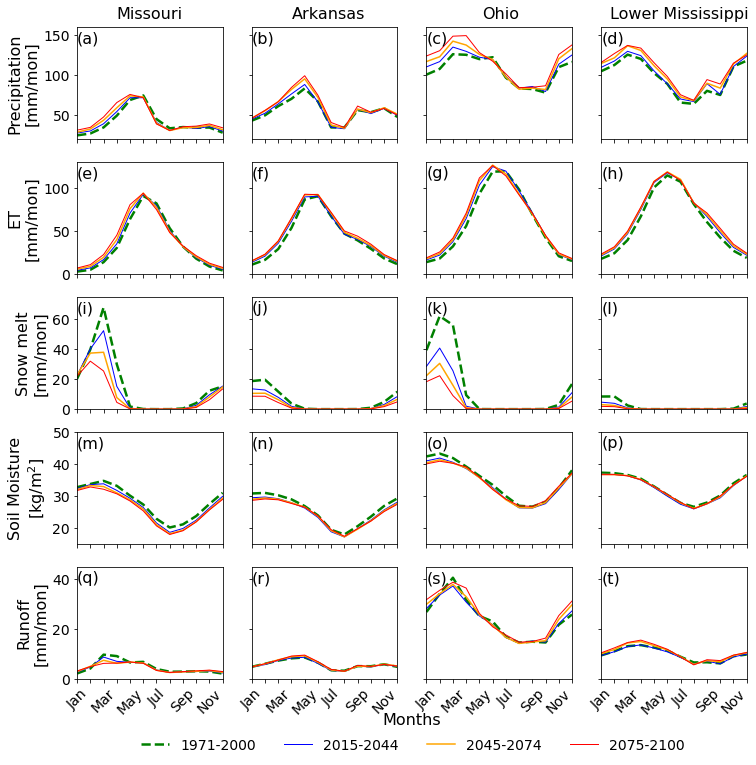

In [183]:

#%matplotlib notebook

# https://matplotlib.org/stable/tutorials/colors/colors.html

fontSize = 14
textFontVal = 16
linewidth = 0.8
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#fig = plt.figure(figsize=(15, 7), constrained_layout=False)
fig = plt.figure(figsize=(12, 12), constrained_layout=False)

#axs = [plt.subplot(4, 4, x + 1,) for x in range(16)]
axs = [plt.subplot(5, 4, x + 1,) for x in range(20)]

ax1 = axs[0]

ln111=ax1.plot(range(nMonsPerYr), precip_refPeriod_ensMean_mon_clim_Missouri, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln112=ax1.plot(range(nMonsPerYr), precip_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln113=ax1.plot(range(nMonsPerYr), precip_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln114=ax1.plot(range(nMonsPerYr), precip_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)

#ax1.set_title('(a) Missouri at Hermann', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax1.set_title('(a)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
#ax1.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
#ax1.text(-1, 1, r'an equation: $E=mc^2$', fontsize=textFontVal)
ax1.text(3, 170, r'Missouri', fontsize=textFontVal)

ax1.set_xticks(range(nMonsPerYr))
ax1.set_xticklabels(monsStr, minor=False)
ax1.set_xticklabels('', )
ax1.set_xlim([0, 11])
ax1.set_ylim([20, 160])

ax1.set_yticks([50, 100, 150]) 
ax1.set_yticklabels(['50', '100', '150'],  fontsize = fontSize) 


#ax1.set_xlabel('Time (Year)')
#ax1.set_ylabel('Discharge, $\mathregular{m^{3}}$/s', fontsize = textFont )
#ax1.set_ylabel('Precipitation', fontsize = textFont )
ax1.set_ylabel('Precipitation\n[mm/mon]', fontsize = textFontVal )

ax1.set_xlabel('')
#ax1.set_ylabel('')
#ax1.get_legend().remove()

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax2 = axs[1]
ln121=ax2.plot(range(nMonsPerYr), precip_refPeriod_ensMean_mon_clim_Arkansas, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln122=ax2.plot(range(nMonsPerYr), precip_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln123=ax2.plot(range(nMonsPerYr), precip_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln124=ax2.plot(range(nMonsPerYr), precip_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ax2.set_title('(b)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax2.text(3, 170, r'Arkansas', fontsize=textFontVal)

ax2.set_xticks(range(nMonsPerYr))
ax2.set_xticklabels(monsStr, minor=False)
ax2.set_xticklabels('', )
ax2.set_yticklabels('', )

ax2.set_xlim([0, 11])
ax2.set_ylim([20, 160])
ax2.set_xlabel('')
ax2.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax3 = axs[2]
ln131=ax3.plot(range(nMonsPerYr), precip_refPeriod_ensMean_mon_clim_Ohio, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln132=ax3.plot(range(nMonsPerYr), precip_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln133=ax3.plot(range(nMonsPerYr), precip_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln134=ax3.plot(range(nMonsPerYr), precip_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ax3.set_title('(c)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax3.text(4.2, 170, r'Ohio', fontsize=textFontVal)

ax3.set_xticks(range(nMonsPerYr))
ax3.set_xticklabels(monsStr, minor=False)
ax3.set_xticklabels('', )
ax3.set_yticklabels('', )

ax3.set_xlim([0, 11])
ax3.set_ylim([20, 160])
ax3.set_xlabel('')
ax3.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax4 = axs[3]
ln141=ax4.plot(range(nMonsPerYr), precip_refPeriod_ensMean_mon_clim_lowMissi, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln142=ax4.plot(range(nMonsPerYr), precip_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln143=ax4.plot(range(nMonsPerYr), precip_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln144=ax4.plot(range(nMonsPerYr), precip_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ax4.set_title('(d)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax4.text(0.7, 170, r'Lower Mississippi', fontsize=textFontVal)

ax4.set_xticks(range(nMonsPerYr))
ax4.set_xticklabels(monsStr, minor=False)
ax4.set_xticklabels('', )
ax4.set_yticklabels('', )

ax4.set_xlim([0, 11])
ax4.set_ylim([20, 160])
ax4.set_xlabel('')
ax4.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax5 = axs[4]
ln151=ax5.plot(range(nMonsPerYr), et_refPeriod_ensMean_mon_clim_Missouri, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln152=ax5.plot(range(nMonsPerYr), et_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln153=ax5.plot(range(nMonsPerYr), et_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln154=ax5.plot(range(nMonsPerYr), et_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)

#ax1.set_title('(a) Missouri at Hermann', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax5.set_title('(e)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax5.set_xticks(range(nMonsPerYr))
ax5.set_xticklabels(monsStr, minor=False)
ax5.set_xticklabels('', )
ax5.set_xlim([0, 11])
ax5.set_ylim([0, 130])

ax5.set_yticks([0, 50, 100]) 
ax5.set_yticklabels(['0', '50', '100'],  fontsize = fontSize) 


#ax5.set_xlabel('Time (Year)')
#ax5.set_ylabel('Discharge, $\mathregular{m^{3}}$/s', fontsize = textFont )
#ax5.set_ylabel('Evapotranspiration', fontsize = textFont )
ax5.set_ylabel('ET\n[mm/mon]', fontsize = textFontVal )

ax5.set_xlabel('')
#ax5.set_ylabel('')
#ax5.get_legend().remove()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
ln161=ax6.plot(range(nMonsPerYr), et_refPeriod_ensMean_mon_clim_Arkansas, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln162=ax6.plot(range(nMonsPerYr), et_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln163=ax6.plot(range(nMonsPerYr), et_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln164=ax6.plot(range(nMonsPerYr), et_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ax6.set_title('(f)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax6.set_xticks(range(nMonsPerYr))
ax6.set_xticklabels(monsStr, minor=False)
ax6.set_xticklabels('', )
ax6.set_yticklabels('', )

ax6.set_xlim([0, 11])
ax6.set_ylim([0, 130])
ax6.set_xlabel('')
ax6.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax7 = axs[6]
ln171=ax7.plot(range(nMonsPerYr), et_refPeriod_ensMean_mon_clim_Ohio, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln172=ax7.plot(range(nMonsPerYr), et_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln173=ax7.plot(range(nMonsPerYr), et_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln174=ax7.plot(range(nMonsPerYr), et_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ax7.set_title('(g)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax7.set_xticks(range(nMonsPerYr))
ax7.set_xticklabels(monsStr, minor=False)
ax7.set_xticklabels('', )
ax7.set_yticklabels('', )

ax7.set_xlim([0, 11])
ax7.set_ylim([0, 130])
ax7.set_xlabel('')
ax7.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
ln181=ax8.plot(range(nMonsPerYr), et_refPeriod_ensMean_mon_clim_lowMissi, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln182=ax8.plot(range(nMonsPerYr), et_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln183=ax8.plot(range(nMonsPerYr), et_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln184=ax8.plot(range(nMonsPerYr), et_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ax8.set_title('(h)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax8.set_xticks(range(nMonsPerYr))
ax8.set_xticklabels(monsStr, minor=False)
ax8.set_xticklabels('', )
ax8.set_yticklabels('', )

ax8.set_xlim([0, 11])
ax8.set_ylim([0, 130])
ax8.set_xlabel('')
ax8.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#snowMelt_refPeriod_ensMean_mon_clim_Missouri

ax9 = axs[8]
ln191=ax9.plot(range(nMonsPerYr), snowMelt_refPeriod_ensMean_mon_clim_Missouri, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln192=ax9.plot(range(nMonsPerYr), snowMelt_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln193=ax9.plot(range(nMonsPerYr), snowMelt_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln194=ax9.plot(range(nMonsPerYr), snowMelt_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)

#ax9.set_title('(a) Missouri at Hermann', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax9.set_title('(i)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax9.set_xticks(range(nMonsPerYr))
ax9.set_xticklabels(monsStr, minor=False)
ax9.set_xticklabels('', )
ax9.set_xlim([0, 11])
ax9.set_ylim([0, 75])

ax9.set_yticks([0, 20, 40, 60]) 
ax9.set_yticklabels(['0', '20', '40', '60'],  fontsize = fontSize) 

#ax9.set_xlabel('Time (Year)')
#ax9.set_ylabel('Discharge, $\mathregular{m^{3}}$/s', fontsize = textFont )
#ax9.set_ylabel('Soil Moisture', fontsize = textFont )
ax9.set_ylabel('Snow melt\n[mm/mon]', fontsize = textFontVal )

ax9.set_xlabel('')
#ax9.set_ylabel('')
#ax9.get_legend().remove()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax10 = axs[9]
ln1101=ax10.plot(range(nMonsPerYr), snowMelt_refPeriod_ensMean_mon_clim_Arkansas, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1102=ax10.plot(range(nMonsPerYr), snowMelt_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln1103=ax10.plot(range(nMonsPerYr), snowMelt_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln1104=ax10.plot(range(nMonsPerYr), snowMelt_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ax10.set_title('(j)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax10.set_xticks(range(nMonsPerYr))
ax10.set_xticklabels(monsStr, minor=False)
ax10.set_xticklabels('', )
ax10.set_yticklabels('', )

ax10.set_xlim([0, 11])
ax10.set_ylim([0, 75])
ax10.set_xlabel('')
ax10.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax11 = axs[10]
ln1111=ax11.plot(range(nMonsPerYr), snowMelt_refPeriod_ensMean_mon_clim_Ohio, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1112=ax11.plot(range(nMonsPerYr), snowMelt_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln1113=ax11.plot(range(nMonsPerYr), snowMelt_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln1114=ax11.plot(range(nMonsPerYr), snowMelt_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ax11.set_title('(k)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax11.set_xticks(range(nMonsPerYr))
ax11.set_xticklabels(monsStr, minor=False)
ax11.set_xticklabels('', )
ax11.set_yticklabels('', )

ax11.set_xlim([0, 11])
ax11.set_ylim([0, 75])
ax11.set_xlabel('')
ax11.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax12 = axs[11]
ln1121=ax12.plot(range(nMonsPerYr), snowMelt_refPeriod_ensMean_mon_clim_lowMissi, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1122=ax12.plot(range(nMonsPerYr), snowMelt_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln1123=ax12.plot(range(nMonsPerYr), snowMelt_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln1124=ax12.plot(range(nMonsPerYr), snowMelt_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ax12.set_title('(l)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax12.set_xticks(range(nMonsPerYr))
ax12.set_xticklabels(monsStr, minor=False)
ax12.set_xticklabels('', )
ax12.set_yticklabels('', )

ax12.set_xlim([0, 11])
ax12.set_ylim([0, 75])
ax12.set_xlabel('')
ax12.set_ylabel('')

#ax12.legend(ncol=1, loc=(+1.005, 0.2),frameon=False)
#ax12.legend(ncol=4, loc=(+0.05, -22.0),frameon=False, fontsize=fontSize)


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax13 = axs[12]
ln1131=ax13.plot(range(nMonsPerYr), soilMoist_refPeriod_ensMean_mon_clim_Missouri, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1132=ax13.plot(range(nMonsPerYr), soilMoist_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln1133=ax13.plot(range(nMonsPerYr), soilMoist_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln1134=ax13.plot(range(nMonsPerYr), soilMoist_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)

#ax13.set_title('(a) Missouri at Hermann', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax13.set_title('(m)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax13.set_xticks(range(nMonsPerYr))
ax13.set_xticklabels(monsStr, minor=False)
ax13.set_xticklabels('', )
ax13.set_xlim([0, 11])
ax13.set_ylim([15, 50])

ax13.set_yticks([20, 30, 40, 50]) 
ax13.set_yticklabels(['20', '30', '40', '50'],  fontsize = fontSize) 


#ax13.set_xlabel('Time (Year)')
#ax13.set_ylabel('Discharge, $\mathregular{m^{3}}$/s', fontsize = textFont )
#ax13.set_ylabel('Soil Moisture', fontsize = textFont )
ax13.set_ylabel('Soil Moisture\n[kg/$\mathregular{m^{2}}$]', fontsize = textFontVal )

ax13.set_xlabel('')
#ax13.set_ylabel('')
#ax13.get_legend().remove()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax14 = axs[13]
ln1141=ax14.plot(range(nMonsPerYr), soilMoist_refPeriod_ensMean_mon_clim_Arkansas, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1142=ax14.plot(range(nMonsPerYr), soilMoist_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln1143=ax14.plot(range(nMonsPerYr), soilMoist_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln1144=ax14.plot(range(nMonsPerYr), soilMoist_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ax14.set_title('(n)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax14.set_xticks(range(nMonsPerYr))
ax14.set_xticklabels(monsStr, minor=False)
ax14.set_xticklabels('', )
ax14.set_yticklabels('', )

ax14.set_xlim([0, 11])
ax14.set_ylim([15, 50])
ax14.set_xlabel('')
ax14.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax15 = axs[14]
ln1151=ax15.plot(range(nMonsPerYr), soilMoist_refPeriod_ensMean_mon_clim_Ohio, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1152=ax15.plot(range(nMonsPerYr), soilMoist_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln1153=ax15.plot(range(nMonsPerYr), soilMoist_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln1154=ax15.plot(range(nMonsPerYr), soilMoist_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ax15.set_title('(o)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax15.set_xticks(range(nMonsPerYr))
ax15.set_xticklabels(monsStr, minor=False)
ax15.set_xticklabels('', )
ax15.set_yticklabels('', )

ax15.set_xlim([0, 11])
ax15.set_ylim([15, 50])
ax15.set_xlabel('')
ax15.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax16 = axs[15]
ln1161=ax16.plot(range(nMonsPerYr), soilMoist_refPeriod_ensMean_mon_clim_lowMissi, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1162=ax16.plot(range(nMonsPerYr), soilMoist_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln1163=ax16.plot(range(nMonsPerYr), soilMoist_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln1164=ax16.plot(range(nMonsPerYr), soilMoist_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ax16.set_title('(p)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax16.set_xticks(range(nMonsPerYr))
ax16.set_xticklabels(monsStr, minor=False)
ax16.set_xticklabels('', )
ax16.set_yticklabels('', )

ax16.set_xlim([0, 11])
ax16.set_ylim([15, 50])
ax16.set_xlabel('')
ax16.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax17 = axs[16]
ln1171=ax17.plot(range(nMonsPerYr), runoff_refPeriod_ensMean_mon_clim_Missouri, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1172=ax17.plot(range(nMonsPerYr), runoff_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln1173=ax17.plot(range(nMonsPerYr), runoff_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln1174=ax17.plot(range(nMonsPerYr), runoff_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)

#ax17.set_title('(a) Missouri at Hermann', y=0.98, pad=-14, fontsize = textFontVal,loc='left')
ax17.set_title('(q)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax17.set_xticks(range(nMonsPerYr))
#ax17.set_xticks(range(6))

#ax17.set_xticklabels(monsStr, minor=False)
ax17.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = fontSize)

#ax17.set_xticklabels('', )
ax17.set_xlim([0, 11])
ax17.set_ylim([0, 45])

ax17.set_yticks([0, 20, 40]) 
ax17.set_yticklabels(['0', '20', '40'],  fontsize = fontSize) 


#ax17.set_xlabel('Time (Year)')
#ax17.set_ylabel('Discharge, $\mathregular{m^{3}}$/s', fontsize = textFont )
ax17.set_ylabel('Runoff\n[mm/mon]', fontsize = textFontVal )

#plt.ylabel('this is vertical\ntest', multialignment='center')

ax17.set_xlabel('')
#ax17.set_ylabel('')
#ax17.get_legend().remove()
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax18 = axs[17]
ln1181=ax18.plot(range(nMonsPerYr), runoff_refPeriod_ensMean_mon_clim_Arkansas, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1182=ax18.plot(range(nMonsPerYr), runoff_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln1183=ax18.plot(range(nMonsPerYr), runoff_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln1184=ax18.plot(range(nMonsPerYr), runoff_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ax18.set_title('(r)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax18.set_xticks(range(nMonsPerYr))
#ax18.set_xticklabels(monsStr, minor=False)
ax18.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = fontSize)

#ax18.set_xticklabels('', )
ax18.set_yticklabels('', )

ax18.set_xlim([0, 11])
ax18.set_ylim([0, 45])
#ax18.set_xlabel('')
ax18.set_xlabel('Months', fontsize = textFontVal)
ax18.xaxis.set_label_coords(1.1, -.3)

ax18.set_ylabel('')
ax18.legend(ncol=4, loc=(-0.8, -0.7),frameon=False, fontsize=fontSize)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax19 = axs[18]
ln1191=ax19.plot(range(nMonsPerYr), runoff_refPeriod_ensMean_mon_clim_Ohio, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1192=ax19.plot(range(nMonsPerYr), runoff_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln1193=ax19.plot(range(nMonsPerYr), runoff_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln1194=ax19.plot(range(nMonsPerYr), runoff_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ax19.set_title('(s)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax19.set_xticks(range(nMonsPerYr))
#ax19.set_xticklabels(monsStr, minor=False)
ax19.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = fontSize)

#ax19.set_xticklabels('', )
ax19.set_yticklabels('', )

ax19.set_xlim([0, 11])
ax19.set_ylim([0, 45])
ax19.set_xlabel('')
ax19.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax20 = axs[19]
ln1201=ax20.plot(range(nMonsPerYr), runoff_refPeriod_ensMean_mon_clim_lowMissi, label="1971-2000", color = 'green', linestyle='dashed', linewidth=2.5)
ln1202=ax20.plot(range(nMonsPerYr), runoff_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln1203=ax20.plot(range(nMonsPerYr), runoff_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln1204=ax20.plot(range(nMonsPerYr), runoff_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ax20.set_title('(t)', y=0.98, pad=-14, fontsize = textFontVal,loc='left')

ax20.set_xticks(range(nMonsPerYr))
ax20.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = fontSize)
#ax20.set_xticklabels(monsStr, minor=False)

#ax20.set_xticklabels('', )
ax20.set_yticklabels('', )

ax20.set_xlim([0, 11])
ax20.set_ylim([0, 45])
ax20.set_xlabel('')
ax20.set_ylabel('')
#ax20.legend(ncol=1, loc=(+1.005, -122.0),frameon=False, fontsize=fontSize)


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#st17 = fig.suptitle("Basin-average parameters", fontsize = 20)
#st17.set_y(0.94)
#st17.set_x(0.515)

plt.show()


## Calculating Percent change of 21st century parameter values relative to the Historical Reference Period average

## Precip

In [184]:
print(precip_refPeriod_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraThree_ensMean_mon_clim_Missouri.shape)

print(precip_refPeriod_ensMean_mon_clim_Arkansas.shape)
print(precip_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(precip_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(precip_scenEraThree_ensMean_mon_clim_Arkansas.shape)

print(precip_refPeriod_ensMean_mon_clim_Ohio.shape)
print(precip_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(precip_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(precip_scenEraThree_ensMean_mon_clim_Ohio.shape)

print(precip_refPeriod_ensMean_mon_clim_lowMissi.shape)
print(precip_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(precip_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(precip_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)


## Missouri

In [185]:
precip_percCh_scenEraOne_ensMean_mon_clim_Missouri = (precip_scenEraOne_ensMean_mon_clim_Missouri-precip_refPeriod_ensMean_mon_clim_Missouri)/precip_refPeriod_ensMean_mon_clim_Missouri*100
print(precip_percCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(precip_percCh_scenEraOne_ensMean_mon_clim_Missouri)

precip_percCh_scenEraTwo_ensMean_mon_clim_Missouri = (precip_scenEraTwo_ensMean_mon_clim_Missouri-precip_refPeriod_ensMean_mon_clim_Missouri)/precip_refPeriod_ensMean_mon_clim_Missouri*100
print(precip_percCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(precip_percCh_scenEraTwo_ensMean_mon_clim_Missouri)

precip_percCh_scenEraThree_ensMean_mon_clim_Missouri = (precip_scenEraThree_ensMean_mon_clim_Missouri-precip_refPeriod_ensMean_mon_clim_Missouri)/precip_refPeriod_ensMean_mon_clim_Missouri*100
print(precip_percCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(precip_percCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[11.72006163 11.56429508 13.20548553 10.22547552  4.16112895 -3.81357477
 -9.32484732 -7.97524267 -0.32372293 -2.46921624  3.32278155  7.42082234]
(12,)
[ 15.99608819  20.62634085  25.67258211  19.850996     7.51085707
  -2.44096786 -11.63261247  -8.23816865  -2.13820038   0.92472651
   7.97731899  13.0446125 ]
(12,)
[ 26.09246307  28.14567602  37.32558335  33.08093525  10.09220428
  -3.83016811 -13.37767037  -8.07385407   1.09091253   5.94159505
  12.84863746  21.65672193]


## Arkansas

In [186]:
precip_percCh_scenEraOne_ensMean_mon_clim_Arkansas = (precip_scenEraOne_ensMean_mon_clim_Arkansas-precip_refPeriod_ensMean_mon_clim_Arkansas)/precip_refPeriod_ensMean_mon_clim_Arkansas*100
print(precip_percCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(precip_percCh_scenEraOne_ensMean_mon_clim_Arkansas)

precip_percCh_scenEraTwo_ensMean_mon_clim_Arkansas = (precip_scenEraTwo_ensMean_mon_clim_Arkansas-precip_refPeriod_ensMean_mon_clim_Arkansas)/precip_refPeriod_ensMean_mon_clim_Arkansas*100
print(precip_percCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(precip_percCh_scenEraTwo_ensMean_mon_clim_Arkansas)

precip_percCh_scenEraThree_ensMean_mon_clim_Arkansas = (precip_scenEraThree_ensMean_mon_clim_Arkansas-precip_refPeriod_ensMean_mon_clim_Arkansas)/precip_refPeriod_ensMean_mon_clim_Arkansas*100
print(precip_percCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(precip_percCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[ 4.49643859  5.28554412  4.61921274  8.62275799  5.91403058 -0.87724959
  0.49597012 -4.45570134  1.94696707 -3.33011017 -0.14990239  4.35623913]
(12,)
[ 7.14647931 11.42467882  9.25392069 16.62462486 14.3339442   7.49511134
  8.82440022 -2.35980278  2.35519567 -1.0105115   1.04867258  7.26164992]
(12,)
[ 6.76818816 12.51158504  8.93017786 20.14863646 18.98036022 11.77946231
 17.62654725  0.29206907  9.05065906 -0.09040791 -0.41153943  5.00666802]


## Ohio

In [187]:
precip_percCh_scenEraOne_ensMean_mon_clim_Ohio = (precip_scenEraOne_ensMean_mon_clim_Ohio-precip_refPeriod_ensMean_mon_clim_Ohio)/precip_refPeriod_ensMean_mon_clim_Ohio*100
print(precip_percCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(precip_percCh_scenEraOne_ensMean_mon_clim_Ohio)

precip_percCh_scenEraTwo_ensMean_mon_clim_Ohio = (precip_scenEraTwo_ensMean_mon_clim_Ohio-precip_refPeriod_ensMean_mon_clim_Ohio)/precip_refPeriod_ensMean_mon_clim_Ohio*100
print(precip_percCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(precip_percCh_scenEraTwo_ensMean_mon_clim_Ohio)

precip_percCh_scenEraThree_ensMean_mon_clim_Ohio = (precip_scenEraThree_ensMean_mon_clim_Ohio-precip_refPeriod_ensMean_mon_clim_Ohio)/precip_refPeriod_ensMean_mon_clim_Ohio*100
print(precip_percCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(precip_percCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[ 9.61469532  8.42247417  7.05747933  3.43324866  1.99240044 -2.32426608
  0.82128663  0.37392332  3.81515035  1.78280959  3.30341739  7.43396769]
(12,)
[16.23406085 14.07056352 12.89244512  9.67782899  4.88435262 -2.31408072
  0.76103876 -1.25350077  1.37956699  4.94841413  9.43331707 14.28830393]
(12,)
[23.12571839 21.06969587 17.82991245 19.08134463  6.79464574 -4.05259981
  4.88545142  1.21590354  2.71411591 10.93744868 14.33966655 18.21520303]


## Lower Mississippi

In [188]:
precip_percCh_scenEraOne_ensMean_mon_clim_lowMissi = (precip_scenEraOne_ensMean_mon_clim_lowMissi-precip_refPeriod_ensMean_mon_clim_lowMissi)/precip_refPeriod_ensMean_mon_clim_lowMissi*100
print(precip_percCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(precip_percCh_scenEraOne_ensMean_mon_clim_lowMissi)

precip_percCh_scenEraTwo_ensMean_mon_clim_lowMissi = (precip_scenEraTwo_ensMean_mon_clim_lowMissi-precip_refPeriod_ensMean_mon_clim_lowMissi)/precip_refPeriod_ensMean_mon_clim_lowMissi*100
print(precip_percCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(precip_percCh_scenEraTwo_ensMean_mon_clim_lowMissi)

precip_percCh_scenEraThree_ensMean_mon_clim_lowMissi = (precip_scenEraThree_ensMean_mon_clim_lowMissi-precip_refPeriod_ensMean_mon_clim_lowMissi)/precip_refPeriod_ensMean_mon_clim_lowMissi*100
print(precip_percCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(precip_percCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[ 4.60881396  4.43660158  3.26949774  3.38606819  2.718327    0.11281568
  6.69256614  4.51803487 11.08469994  1.02770978  0.05402916  4.75149578]
(12,)
[ 9.22605433  7.95168821  8.80512447  8.76362321  8.93768026  6.82166852
 10.62933577  6.27498571 11.78062125 11.3664716   2.85355468  7.65753786]
(12,)
[10.4228489  12.71977964  9.1301043  11.18200642 12.63462339 10.41158097
 14.7684581   6.96106938 17.39784404 18.20252116  3.81850703  6.01252153]


## ET

In [189]:
print(et_refPeriod_ensMean_mon_clim_Missouri.shape)
print(et_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(et_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(et_scenEraThree_ensMean_mon_clim_Missouri.shape)

print(et_refPeriod_ensMean_mon_clim_Arkansas.shape)
print(et_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(et_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(et_scenEraThree_ensMean_mon_clim_Arkansas.shape)

print(et_refPeriod_ensMean_mon_clim_Ohio.shape)
print(et_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(et_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(et_scenEraThree_ensMean_mon_clim_Ohio.shape)

print(et_refPeriod_ensMean_mon_clim_lowMissi.shape)
print(et_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(et_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(et_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)


## Missouri

In [190]:
et_percCh_scenEraOne_ensMean_mon_clim_Missouri = (et_scenEraOne_ensMean_mon_clim_Missouri-et_refPeriod_ensMean_mon_clim_Missouri)/et_refPeriod_ensMean_mon_clim_Missouri*100
print(et_percCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(et_percCh_scenEraOne_ensMean_mon_clim_Missouri)

et_percCh_scenEraTwo_ensMean_mon_clim_Missouri = (et_scenEraTwo_ensMean_mon_clim_Missouri-et_refPeriod_ensMean_mon_clim_Missouri)/et_refPeriod_ensMean_mon_clim_Missouri*100
print(et_percCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(et_percCh_scenEraTwo_ensMean_mon_clim_Missouri)

et_percCh_scenEraThree_ensMean_mon_clim_Missouri = (et_scenEraThree_ensMean_mon_clim_Missouri-et_refPeriod_ensMean_mon_clim_Missouri)/et_refPeriod_ensMean_mon_clim_Missouri*100
print(et_percCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(et_percCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[49.66227791 43.16819147 21.46227898 15.34836288 10.97453455  2.15564948
 -3.20596751 -4.95343231 -0.99600956  6.02324034 16.82458622 30.68198746]
(12,)
[91.85637854 79.15345935 40.95729697 31.25241286 18.92929167  3.62662297
 -5.67255594 -7.63995137 -0.58405027 11.43843399 29.07594228 55.98785081]
(12,)
[135.3390735  116.59709879  63.2135188   48.21837371  26.21102491
   3.58984628  -8.76995706  -9.66414066   1.96709601  18.83897061
  43.77666667  81.91694943]


## Arkansas

In [191]:
et_percCh_scenEraOne_ensMean_mon_clim_Arkansas = (et_scenEraOne_ensMean_mon_clim_Arkansas-et_refPeriod_ensMean_mon_clim_Arkansas)/et_refPeriod_ensMean_mon_clim_Arkansas*100
print(et_percCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(et_percCh_scenEraOne_ensMean_mon_clim_Arkansas)

et_percCh_scenEraTwo_ensMean_mon_clim_Arkansas = (et_scenEraTwo_ensMean_mon_clim_Arkansas-et_refPeriod_ensMean_mon_clim_Arkansas)/et_refPeriod_ensMean_mon_clim_Arkansas*100
print(et_percCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(et_percCh_scenEraTwo_ensMean_mon_clim_Arkansas)

et_percCh_scenEraThree_ensMean_mon_clim_Arkansas = (et_scenEraThree_ensMean_mon_clim_Arkansas-et_refPeriod_ensMean_mon_clim_Arkansas)/et_refPeriod_ensMean_mon_clim_Arkansas*100
print(et_percCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(et_percCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[24.83698159 26.07389738 22.97070458 14.11628821  3.29261872 -0.05997464
  0.6046827  -1.59686344  2.68460167  8.83956801 14.03643393 20.36840772]
(12,)
[35.80421955 35.85386926 29.91895052 19.43446905  5.96611402  2.14483921
  5.53954766  3.1202216   6.21093196 12.7932202  19.47432674 28.88286514]
(12,)
[41.40103863 39.66398671 32.34873288 21.45337194  6.89447143  1.94246509
  6.89524535  6.63156556 12.5552197  18.19529287 24.74404949 34.78343247]


## Ohio

In [192]:
et_percCh_scenEraOne_ensMean_mon_clim_Ohio = (et_scenEraOne_ensMean_mon_clim_Ohio-et_refPeriod_ensMean_mon_clim_Ohio)/et_refPeriod_ensMean_mon_clim_Ohio*100
print(et_percCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(et_percCh_scenEraOne_ensMean_mon_clim_Ohio)

et_percCh_scenEraTwo_ensMean_mon_clim_Ohio = (et_scenEraTwo_ensMean_mon_clim_Ohio-et_refPeriod_ensMean_mon_clim_Ohio)/et_refPeriod_ensMean_mon_clim_Ohio*100
print(et_percCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(et_percCh_scenEraTwo_ensMean_mon_clim_Ohio)

et_percCh_scenEraThree_ensMean_mon_clim_Ohio = (et_scenEraThree_ensMean_mon_clim_Ohio-et_refPeriod_ensMean_mon_clim_Ohio)/et_refPeriod_ensMean_mon_clim_Ohio*100
print(et_percCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(et_percCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[17.93755796 22.36943578 17.05567336 15.35741086 10.76859952  4.91387289
  0.22167604 -1.5842331   2.51088956  4.93911434  8.62081649  8.94421403]
(12,)
[26.7743082  31.82803599 23.28999734 21.77401899 16.31057592  6.39539373
 -2.56841426 -5.35226517  0.58752622  3.6840112  12.37859608 13.56616325]
(12,)
[35.58077761 41.73212219 29.90286803 26.71202339 19.68356664  5.95053842
 -4.4474554  -6.46047013  1.9610292   6.21329495 18.76859126 18.79121681]


## Lower Mississippi

In [193]:
et_percCh_scenEraOne_ensMean_mon_clim_lowMissi = (et_scenEraOne_ensMean_mon_clim_lowMissi-et_refPeriod_ensMean_mon_clim_lowMissi)/et_refPeriod_ensMean_mon_clim_lowMissi*100
print(et_percCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(et_percCh_scenEraOne_ensMean_mon_clim_lowMissi)

et_percCh_scenEraTwo_ensMean_mon_clim_lowMissi = (et_scenEraTwo_ensMean_mon_clim_lowMissi-et_refPeriod_ensMean_mon_clim_lowMissi)/et_refPeriod_ensMean_mon_clim_lowMissi*100
print(et_percCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(et_percCh_scenEraTwo_ensMean_mon_clim_lowMissi)

et_percCh_scenEraThree_ensMean_mon_clim_lowMissi = (et_scenEraThree_ensMean_mon_clim_lowMissi-et_refPeriod_ensMean_mon_clim_lowMissi)/et_refPeriod_ensMean_mon_clim_lowMissi*100
print(et_percCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(et_percCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[18.79429009 20.48214275 18.29126766 11.84235456  5.67009972  2.65680554
  2.04020653  1.99607967 10.57970019 13.19712937 14.50641872 16.60459662]
(12,)
[25.20396795 25.51228472 22.25167361 14.37869615  6.85295112  3.54258764
  2.56983433  1.61272715 14.01048302 19.2246481  21.04165473 23.01759635]
(12,)
[31.27953706 30.77894675 26.00244004 16.06763279  7.01945471  3.23170736
  1.52412518  1.27521775 17.42573871 24.9463106  28.02019987 29.04362048]


## Snowmelt

### Missouri

In [194]:
snowMelt_percCh_scenEraOne_ensMean_mon_clim_Missouri = (snowMelt_scenEraOne_ensMean_mon_clim_Missouri-snowMelt_refPeriod_ensMean_mon_clim_Missouri)/snowMelt_refPeriod_ensMean_mon_clim_Missouri*100
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_Missouri)

snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Missouri = (snowMelt_scenEraTwo_ensMean_mon_clim_Missouri-snowMelt_refPeriod_ensMean_mon_clim_Missouri)/snowMelt_refPeriod_ensMean_mon_clim_Missouri*100
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Missouri)

snowMelt_percCh_scenEraThree_ensMean_mon_clim_Missouri = (snowMelt_scenEraThree_ensMean_mon_clim_Missouri-snowMelt_refPeriod_ensMean_mon_clim_Missouri)/snowMelt_refPeriod_ensMean_mon_clim_Missouri*100
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[ 11.5232074    0.94940651 -22.76464866 -49.26254398 -62.2457429
 -86.41432338 -98.33587018 -90.77431429 -57.90043991 -37.71460168
 -22.12609925   0.62388701]
(12,)
[ 12.93011282  -6.1478657  -44.01959047 -74.26185419 -80.63601429
 -96.93240975 -99.71173396 -98.72232864 -76.44310506 -59.09797733
 -33.88698665  -3.20702178]
(12,)
[  8.62335191 -19.64049085 -62.44402509 -84.88191519 -91.11424273
 -99.75221602 -99.97952399 -99.97352912 -91.97317156 -72.22390672
 -48.96915675 -11.47709323]


### Arkansas

In [195]:
snowMelt_percCh_scenEraOne_ensMean_mon_clim_Arkansas = (snowMelt_scenEraOne_ensMean_mon_clim_Arkansas-snowMelt_refPeriod_ensMean_mon_clim_Arkansas)/snowMelt_refPeriod_ensMean_mon_clim_Arkansas*100
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_Arkansas)

snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Arkansas = (snowMelt_scenEraTwo_ensMean_mon_clim_Arkansas-snowMelt_refPeriod_ensMean_mon_clim_Arkansas)/snowMelt_refPeriod_ensMean_mon_clim_Arkansas*100
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Arkansas)

snowMelt_percCh_scenEraThree_ensMean_mon_clim_Arkansas = (snowMelt_scenEraThree_ensMean_mon_clim_Arkansas-snowMelt_refPeriod_ensMean_mon_clim_Arkansas)/snowMelt_refPeriod_ensMean_mon_clim_Arkansas*100
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[-27.67744232 -34.96680207 -32.50927912 -49.73597195 -66.83011293
 -51.83251148 -97.62218739 -99.61410619 -65.98170211 -50.68642497
 -35.50071335 -27.57008406]
(12,)
[-43.83384874 -45.87060189 -46.14982986 -69.97318091 -78.96041674
 -98.60232762 -99.86654657 -99.97347188 -84.78846987 -64.28106056
 -51.84456143 -43.36450352]
(12,)
[ -53.81460832  -56.2288041   -62.35988243  -81.77892212  -89.75054176
  -99.6025416  -100.         -100.          -92.56104487  -79.83020913
  -65.35206597  -58.13577824]


### Ohio

In [196]:
snowMelt_percCh_scenEraOne_ensMean_mon_clim_Ohio = (snowMelt_scenEraOne_ensMean_mon_clim_Ohio-snowMelt_refPeriod_ensMean_mon_clim_Ohio)/snowMelt_refPeriod_ensMean_mon_clim_Ohio*100
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_Ohio)

snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Ohio = (snowMelt_scenEraTwo_ensMean_mon_clim_Ohio-snowMelt_refPeriod_ensMean_mon_clim_Ohio)/snowMelt_refPeriod_ensMean_mon_clim_Ohio*100
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_Ohio)

snowMelt_percCh_scenEraThree_ensMean_mon_clim_Ohio = (snowMelt_scenEraThree_ensMean_mon_clim_Ohio-snowMelt_refPeriod_ensMean_mon_clim_Ohio)/snowMelt_refPeriod_ensMean_mon_clim_Ohio*100
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[ -27.42754466  -34.3685343   -54.3106576   -79.18173275  -80.34459187
  -93.08454271 -100.         -100.          -98.79544516  -72.93015321
  -51.67311134  -34.73403896]
(12,)
[ -43.14889237  -50.8104157   -71.60411881  -90.07842625  -94.22984056
  -98.97361219 -100.         -100.          -99.95678776  -93.74774221
  -73.7740599   -52.06504794]
(12,)
[ -53.41253718  -64.081106    -83.91935679  -96.17890836  -99.53774256
 -100.         -100.         -100.          -99.99963386  -97.07120222
  -84.73321469  -68.22644763]


### Lower Mississippi

In [197]:
snowMelt_percCh_scenEraOne_ensMean_mon_clim_lowMissi = (snowMelt_scenEraOne_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)/snowMelt_refPeriod_ensMean_mon_clim_lowMissi*100
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(snowMelt_percCh_scenEraOne_ensMean_mon_clim_lowMissi)

snowMelt_percCh_scenEraTwo_ensMean_mon_clim_lowMissi = (snowMelt_scenEraTwo_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)/snowMelt_refPeriod_ensMean_mon_clim_lowMissi*100
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(snowMelt_percCh_scenEraTwo_ensMean_mon_clim_lowMissi)

snowMelt_percCh_scenEraThree_ensMean_mon_clim_lowMissi = (snowMelt_scenEraThree_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)/snowMelt_refPeriod_ensMean_mon_clim_lowMissi*100
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(snowMelt_percCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[ -44.61993106  -54.12472497  -65.33685863  -76.75060219 -100.
           nan           nan           nan           nan  -99.20844896
  -66.29694159  -52.57207285]
(12,)
[ -64.05255687  -71.16059218  -80.35587666  -74.91142498 -100.
           nan           nan           nan           nan  -99.96878872
  -87.22660312  -69.98554854]
(12,)
[ -78.00944554  -80.48016411  -89.71997951  -93.58546892 -100.
           nan           nan           nan           nan  -99.99694451
  -94.36803552  -88.65353943]


<ipython-input-197-2b4d2bf950ed>:1: RuntimeWarning: invalid value encountered in true_divide
  snowMelt_percCh_scenEraOne_ensMean_mon_clim_lowMissi = (snowMelt_scenEraOne_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)/snowMelt_refPeriod_ensMean_mon_clim_lowMissi*100
<ipython-input-197-2b4d2bf950ed>:5: RuntimeWarning: invalid value encountered in true_divide
  snowMelt_percCh_scenEraTwo_ensMean_mon_clim_lowMissi = (snowMelt_scenEraTwo_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)/snowMelt_refPeriod_ensMean_mon_clim_lowMissi*100
<ipython-input-197-2b4d2bf950ed>:9: RuntimeWarning: invalid value encountered in true_divide
  snowMelt_percCh_scenEraThree_ensMean_mon_clim_lowMissi = (snowMelt_scenEraThree_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)/snowMelt_refPeriod_ensMean_mon_clim_lowMissi*100


## Soil Moisture

### Missouri

In [198]:
soilMoist_percCh_scenEraOne_ensMean_mon_clim_Missouri = (soilMoist_scenEraOne_ensMean_mon_clim_Missouri-soilMoist_refPeriod_ensMean_mon_clim_Missouri)/soilMoist_refPeriod_ensMean_mon_clim_Missouri*100
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_Missouri)

soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Missouri = (soilMoist_scenEraTwo_ensMean_mon_clim_Missouri-soilMoist_refPeriod_ensMean_mon_clim_Missouri)/soilMoist_refPeriod_ensMean_mon_clim_Missouri*100
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Missouri)

soilMoist_percCh_scenEraThree_ensMean_mon_clim_Missouri = (soilMoist_scenEraThree_ensMean_mon_clim_Missouri-soilMoist_refPeriod_ensMean_mon_clim_Missouri)/soilMoist_refPeriod_ensMean_mon_clim_Missouri*100
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[-1.3371074  -0.59853719 -2.63629578 -4.28416745 -2.69772497 -3.39317923
 -5.69468854 -7.43418133 -6.05169774 -5.40812603 -4.49364469 -3.54420881]
(12,)
[-2.34583594 -1.44101066 -5.11844564 -6.63345969 -4.39435741 -5.27265134
 -7.92639823 -9.64436334 -8.57397491 -7.18189266 -6.22417059 -5.36078642]
(12,)
[ -3.17415287  -2.75391993  -7.51219411  -7.51784728  -5.52083881
  -7.25210833  -9.63438586 -10.74971289  -9.37318057  -7.72960461
  -6.7032048   -6.59188029]


## Arkansas

In [199]:
soilMoist_percCh_scenEraOne_ensMean_mon_clim_Arkansas = (soilMoist_scenEraOne_ensMean_mon_clim_Arkansas-soilMoist_refPeriod_ensMean_mon_clim_Arkansas)/soilMoist_refPeriod_ensMean_mon_clim_Arkansas*100
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_Arkansas)

soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Arkansas = (soilMoist_scenEraTwo_ensMean_mon_clim_Arkansas-soilMoist_refPeriod_ensMean_mon_clim_Arkansas)/soilMoist_refPeriod_ensMean_mon_clim_Arkansas*100
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Arkansas)

soilMoist_percCh_scenEraThree_ensMean_mon_clim_Arkansas = (soilMoist_scenEraThree_ensMean_mon_clim_Arkansas-soilMoist_refPeriod_ensMean_mon_clim_Arkansas)/soilMoist_refPeriod_ensMean_mon_clim_Arkansas*100
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[-4.28337606 -4.17020456 -3.48571449 -3.56517641 -2.23104752 -2.61403825
 -3.20712274 -4.39149821 -3.80662999 -4.54044344 -4.58243902 -3.95801836]
(12,)
[-5.8098329  -5.154388   -3.99575362 -3.72667661 -1.1435514  -1.14888835
 -1.37176909 -4.07615098 -4.47275583 -5.50175967 -5.56989282 -5.15730525]
(12,)
[-6.99716774 -6.10442954 -4.65294348 -4.42722618 -1.23385885 -0.50033024
  0.14935573 -3.19172714 -3.74542414 -5.926038   -6.52122809 -6.28651574]


## Ohio

In [200]:
soilMoist_percCh_scenEraOne_ensMean_mon_clim_Ohio = (soilMoist_scenEraOne_ensMean_mon_clim_Ohio-soilMoist_refPeriod_ensMean_mon_clim_Ohio)/soilMoist_refPeriod_ensMean_mon_clim_Ohio*100
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_Ohio)

soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Ohio = (soilMoist_scenEraTwo_ensMean_mon_clim_Ohio-soilMoist_refPeriod_ensMean_mon_clim_Ohio)/soilMoist_refPeriod_ensMean_mon_clim_Ohio*100
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_Ohio)

soilMoist_percCh_scenEraThree_ensMean_mon_clim_Ohio = (soilMoist_scenEraThree_ensMean_mon_clim_Ohio-soilMoist_refPeriod_ensMean_mon_clim_Ohio)/soilMoist_refPeriod_ensMean_mon_clim_Ohio*100
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[-3.28981264 -3.23306337 -3.15807064 -1.54745118 -1.40178211 -2.56901806
 -3.21660462 -2.40372448 -1.68945523 -1.83668668 -1.50311757 -2.85624724]
(12,)
[-4.63331277 -4.50002018 -3.7036644  -1.05702173 -1.55233081 -3.64991395
 -3.73021872 -1.95945163 -1.37111256 -0.60975229  0.02761924 -2.73891185]
(12,)
[-5.50511257 -5.53473736 -3.92678934 -0.24091154 -1.07733447 -4.32637409
 -3.0990689  -0.06165943  0.29944652  1.49582795  1.69119462 -2.28362694]


## Lower Missi

In [201]:
soilMoist_percCh_scenEraOne_ensMean_mon_clim_lowMissi = (soilMoist_scenEraOne_ensMean_mon_clim_lowMissi-soilMoist_refPeriod_ensMean_mon_clim_lowMissi)/soilMoist_refPeriod_ensMean_mon_clim_lowMissi*100
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(soilMoist_percCh_scenEraOne_ensMean_mon_clim_lowMissi)

soilMoist_percCh_scenEraTwo_ensMean_mon_clim_lowMissi = (soilMoist_scenEraTwo_ensMean_mon_clim_lowMissi-soilMoist_refPeriod_ensMean_mon_clim_lowMissi)/soilMoist_refPeriod_ensMean_mon_clim_lowMissi*100
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(soilMoist_percCh_scenEraTwo_ensMean_mon_clim_lowMissi)

soilMoist_percCh_scenEraThree_ensMean_mon_clim_lowMissi = (soilMoist_scenEraThree_ensMean_mon_clim_lowMissi-soilMoist_refPeriod_ensMean_mon_clim_lowMissi)/soilMoist_refPeriod_ensMean_mon_clim_lowMissi*100
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(soilMoist_percCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[-1.20210233 -1.08397041 -0.67424091 -1.1012074  -1.02041755 -1.36028586
 -1.51873984 -2.46788724 -1.53797293 -2.38991337 -2.11330972 -0.94794161]
(12,)
[-1.36853742 -1.17513339 -0.57744236 -0.72309244 -0.29044622 -0.03653118
 -0.07438288 -1.88365615 -1.30975244 -1.35530733 -1.58827048 -0.84956727]
(12,)
[-1.67273076 -1.22560368 -0.7361981  -0.88426273 -0.12466331  0.41009814
  0.55948149 -2.33765728 -1.22490225 -0.39737427 -1.54994626 -1.27154804]


## Runoff

### Missouri

In [202]:
runoff_percCh_scenEraOne_ensMean_mon_clim_Missouri = (runoff_scenEraOne_ensMean_mon_clim_Missouri-runoff_refPeriod_ensMean_mon_clim_Missouri)/runoff_refPeriod_ensMean_mon_clim_Missouri*100
print(runoff_percCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(runoff_percCh_scenEraOne_ensMean_mon_clim_Missouri)

runoff_percCh_scenEraTwo_ensMean_mon_clim_Missouri = (runoff_scenEraTwo_ensMean_mon_clim_Missouri-runoff_refPeriod_ensMean_mon_clim_Missouri)/runoff_refPeriod_ensMean_mon_clim_Missouri*100
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_Missouri)

runoff_percCh_scenEraThree_ensMean_mon_clim_Missouri = (runoff_scenEraThree_ensMean_mon_clim_Missouri-runoff_refPeriod_ensMean_mon_clim_Missouri)/runoff_refPeriod_ensMean_mon_clim_Missouri*100
print(runoff_percCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(runoff_percCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[ 21.67066715  14.04345336  -9.82783808 -22.85816889   1.0288393
  -5.76285372  -8.8854043   -9.71148336  -2.30496075  -3.94772589
   5.63481033  13.06480231]
(12,)
[ 33.67014134  20.24583031 -23.15468751 -31.38098334   2.71555715
  -6.39074513 -11.72632474 -10.61299514  -3.45417833  -0.73963229
  12.34682363  24.43435681]
(12,)
[ 45.18434108  17.58816425 -35.67521885 -30.36394627   2.84708082
  -8.39102211 -14.52902188 -10.57898154  -0.21305817   5.35564814
  18.55117736  37.86151054]


### Arkansas

In [203]:
runoff_percCh_scenEraOne_ensMean_mon_clim_Arkansas = (runoff_scenEraOne_ensMean_mon_clim_Arkansas-runoff_refPeriod_ensMean_mon_clim_Arkansas)/runoff_refPeriod_ensMean_mon_clim_Arkansas*100
print(runoff_percCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(runoff_percCh_scenEraOne_ensMean_mon_clim_Arkansas)

runoff_percCh_scenEraTwo_ensMean_mon_clim_Arkansas = (runoff_scenEraTwo_ensMean_mon_clim_Arkansas-runoff_refPeriod_ensMean_mon_clim_Arkansas)/runoff_refPeriod_ensMean_mon_clim_Arkansas*100
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_Arkansas)

runoff_percCh_scenEraThree_ensMean_mon_clim_Arkansas = (runoff_scenEraThree_ensMean_mon_clim_Arkansas-runoff_refPeriod_ensMean_mon_clim_Arkansas)/runoff_refPeriod_ensMean_mon_clim_Arkansas*100
print(runoff_percCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(runoff_percCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[-1.47018784 -5.25486916  0.82587706  1.42652172  0.85491774 -4.50362761
 -2.73258245 -6.99847545 -0.03114521 -5.21328401 -0.93612998  2.74266056]
(12,)
[-0.55762179 -0.81769735  4.41482527  7.96566184  7.8857949   2.37130594
  3.08845453 -6.23430819 -0.031797   -2.42893641  0.60839663  6.76570218]
(12,)
[-1.04557642  0.42806747  3.13859676 10.93955595 11.00993415  5.71924932
  9.76338588 -5.98422883  5.56723742 -1.82422325 -0.85270679  5.99878719]


### Ohio

In [204]:
runoff_percCh_scenEraOne_ensMean_mon_clim_Ohio = (runoff_scenEraOne_ensMean_mon_clim_Ohio-runoff_refPeriod_ensMean_mon_clim_Ohio)/runoff_refPeriod_ensMean_mon_clim_Ohio*100
print(runoff_percCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(runoff_percCh_scenEraOne_ensMean_mon_clim_Ohio)

runoff_percCh_scenEraTwo_ensMean_mon_clim_Ohio = (runoff_scenEraTwo_ensMean_mon_clim_Ohio-runoff_refPeriod_ensMean_mon_clim_Ohio)/runoff_refPeriod_ensMean_mon_clim_Ohio*100
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_Ohio)

runoff_percCh_scenEraThree_ensMean_mon_clim_Ohio = (runoff_scenEraThree_ensMean_mon_clim_Ohio-runoff_refPeriod_ensMean_mon_clim_Ohio)/runoff_refPeriod_ensMean_mon_clim_Ohio*100
print(runoff_percCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(runoff_percCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[ 5.30344584 -1.37844199 -8.16419166 -2.78898176  0.16466501 -5.65793273
 -1.37650726 -1.93657432  1.73559199  1.06417849  2.29378928  5.62963124]
(12,)
[11.44964906  0.21333354 -6.58015779  4.02787535  2.26613946 -6.64489757
 -1.22901836 -2.4553132  -0.58926718  4.76665796  9.85272529 15.14217564]
(12,)
[18.40544342  4.16416247 -4.45468972 14.88479093  4.15790331 -9.23147285
  4.46466541  1.03907904  0.48913212 11.92248741 16.84563977 20.98181735]


### Lower Missi

In [205]:
runoff_percCh_scenEraOne_ensMean_mon_clim_lowMissi = (runoff_scenEraOne_ensMean_mon_clim_lowMissi-runoff_refPeriod_ensMean_mon_clim_lowMissi)/runoff_refPeriod_ensMean_mon_clim_lowMissi*100
print(runoff_percCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(runoff_percCh_scenEraOne_ensMean_mon_clim_lowMissi)

runoff_percCh_scenEraTwo_ensMean_mon_clim_lowMissi = (runoff_scenEraTwo_ensMean_mon_clim_lowMissi-runoff_refPeriod_ensMean_mon_clim_lowMissi)/runoff_refPeriod_ensMean_mon_clim_lowMissi*100
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(runoff_percCh_scenEraTwo_ensMean_mon_clim_lowMissi)

runoff_percCh_scenEraThree_ensMean_mon_clim_lowMissi = (runoff_scenEraThree_ensMean_mon_clim_lowMissi-runoff_refPeriod_ensMean_mon_clim_lowMissi)/runoff_refPeriod_ensMean_mon_clim_lowMissi*100
print(runoff_percCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(runoff_percCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[-0.64109979 -1.60435175 -1.22353278  0.57005475 -1.39801962 -4.51951993
 -2.67573382 -9.74997956  6.38192381 -2.76771718 -2.73907898  1.4966504 ]
(12,)
[  7.42891668   6.37649003   9.77570491  10.49600555   6.32402575
   2.42094205   0.29276258 -11.19511832   9.45075142   9.9971445
   2.7580273    7.87451789]
(12,)
[ 10.83115491  12.21613337  11.07621199  14.67566408  10.36605303
   4.71018355  -0.62378085 -14.4330379   15.19013342  17.88592987
   4.85202433   8.19429231]


## Calculating Relative change of 21st century parameter values relative to the Historical Reference Period average

### Precip

In [206]:
print(precip_refPeriod_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(precip_scenEraThree_ensMean_mon_clim_Missouri.shape)

print(precip_refPeriod_ensMean_mon_clim_Arkansas.shape)
print(precip_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(precip_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(precip_scenEraThree_ensMean_mon_clim_Arkansas.shape)

print(precip_refPeriod_ensMean_mon_clim_Ohio.shape)
print(precip_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(precip_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(precip_scenEraThree_ensMean_mon_clim_Ohio.shape)

print(precip_refPeriod_ensMean_mon_clim_lowMissi.shape)
print(precip_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(precip_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(precip_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)


### Missouri

In [207]:
precip_relCh_scenEraOne_ensMean_mon_clim_Missouri = (precip_scenEraOne_ensMean_mon_clim_Missouri-precip_refPeriod_ensMean_mon_clim_Missouri)
print(precip_relCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(precip_relCh_scenEraOne_ensMean_mon_clim_Missouri)

precip_relCh_scenEraTwo_ensMean_mon_clim_Missouri = (precip_scenEraTwo_ensMean_mon_clim_Missouri-precip_refPeriod_ensMean_mon_clim_Missouri)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_Missouri)

precip_relCh_scenEraThree_ensMean_mon_clim_Missouri = (precip_scenEraThree_ensMean_mon_clim_Missouri-precip_refPeriod_ensMean_mon_clim_Missouri)
print(precip_relCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(precip_relCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[ 2.9069195   3.13556634  4.58081981  5.04390618  2.86355688 -2.84076557
 -4.19755621 -2.67767722 -0.11371832 -0.84615664  1.14826022  2.08808295]
(12,)
[ 3.96749967  5.59266774  8.90550161  9.79187336  5.16873346 -1.81829854
 -5.2363908  -2.76595427 -0.75111318  0.31688739  2.75673797  3.67051408]
(12,)
[ 6.47169717  7.63147547 12.9477838  16.31778721  6.94513469 -2.8531261
 -6.02192416 -2.71078587  0.38321889  2.03607931  4.44012917  6.09380331]


## Arkansas

In [208]:
precip_relCh_scenEraOne_ensMean_mon_clim_Arkansas = (precip_scenEraOne_ensMean_mon_clim_Arkansas-precip_refPeriod_ensMean_mon_clim_Arkansas)
print(precip_relCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(precip_relCh_scenEraOne_ensMean_mon_clim_Arkansas)

precip_relCh_scenEraTwo_ensMean_mon_clim_Arkansas = (precip_scenEraTwo_ensMean_mon_clim_Arkansas-precip_refPeriod_ensMean_mon_clim_Arkansas)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_Arkansas)

precip_relCh_scenEraThree_ensMean_mon_clim_Arkansas = (precip_scenEraThree_ensMean_mon_clim_Arkansas-precip_refPeriod_ensMean_mon_clim_Arkansas)
print(precip_relCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(precip_relCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[ 1.93931659  2.62833625  2.82544409  6.06153969  4.92285363 -0.58678693
  0.17182641 -1.54038702  1.09433623 -1.78671839 -0.08777983  2.08036032]
(12,)
[ 3.0822807   5.68113647  5.66036616 11.68661159 11.93161046  5.01343453
  3.05717015 -0.81581087  1.32379021 -0.5421741   0.61408162  3.4678648 ]
(12,)
[ 2.9191235   6.22162103  5.46234167 14.16388582 15.79929861  7.8792109
  6.10663078  0.10097162  5.08712461 -0.04850695 -0.24098923  2.39097836]


## Ohio

In [209]:
precip_relCh_scenEraOne_ensMean_mon_clim_Ohio = (precip_scenEraOne_ensMean_mon_clim_Ohio-precip_refPeriod_ensMean_mon_clim_Ohio)
print(precip_relCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(precip_relCh_scenEraOne_ensMean_mon_clim_Ohio)

precip_relCh_scenEraTwo_ensMean_mon_clim_Ohio = (precip_scenEraTwo_ensMean_mon_clim_Ohio-precip_refPeriod_ensMean_mon_clim_Ohio)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_Ohio)

precip_relCh_scenEraThree_ensMean_mon_clim_Ohio = (precip_scenEraThree_ensMean_mon_clim_Ohio-precip_refPeriod_ensMean_mon_clim_Ohio)
print(precip_relCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(precip_relCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[ 9.65311722  9.05784803  8.88041685  4.29479643  2.38514324 -2.83740107
  0.79371033  0.31128557  3.14653073  1.3907456   3.62526343  8.64037657]
(12,)
[16.29893481 15.13201746 16.22254654 12.10640693  5.84715821 -2.82496706
  0.7354854  -1.04352064  1.13779262  3.86019082 10.35238823 16.60705719]
(12,)
[23.21813254 22.65914974 22.43535511 23.86966365  8.1340091  -4.94730407
  4.72141289  1.01222151  2.23845677  8.53215553 15.73675455 21.17122647]


## Lower Mississippi

In [210]:
precip_relCh_scenEraOne_ensMean_mon_clim_lowMissi = (precip_scenEraOne_ensMean_mon_clim_lowMissi-precip_refPeriod_ensMean_mon_clim_lowMissi)
print(precip_relCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(precip_relCh_scenEraOne_ensMean_mon_clim_lowMissi)

precip_relCh_scenEraTwo_ensMean_mon_clim_lowMissi = (precip_scenEraTwo_ensMean_mon_clim_lowMissi-precip_refPeriod_ensMean_mon_clim_lowMissi)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(precip_relCh_scenEraTwo_ensMean_mon_clim_lowMissi)

precip_relCh_scenEraThree_ensMean_mon_clim_lowMissi = (precip_scenEraThree_ensMean_mon_clim_lowMissi-precip_refPeriod_ensMean_mon_clim_lowMissi)
print(precip_relCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(precip_relCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[4.82145039 4.98497016 4.09807141 4.06275133 2.78019252 0.10029821
 4.39267617 2.89171033 8.89542096 0.77153221 0.05968544 5.59591634]
(12,)
[ 9.65171596  8.93452518 11.03656638 10.51497484  9.14109003  6.06476992
  6.97658102  4.01622421  9.45389463  8.53314736  3.15229134  9.01841087]
(12,)
[10.90372694 14.29195768 11.44390435 13.4166558  12.92217069  9.25636344
  9.69330038  4.45534327 13.96169021 13.66517252  4.21826388  7.08104753]


## ET

In [211]:
print(et_refPeriod_ensMean_mon_clim_Missouri.shape)
print(et_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(et_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(et_scenEraThree_ensMean_mon_clim_Missouri.shape)

print(et_refPeriod_ensMean_mon_clim_Arkansas.shape)
print(et_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(et_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(et_scenEraThree_ensMean_mon_clim_Arkansas.shape)

print(et_refPeriod_ensMean_mon_clim_Ohio.shape)
print(et_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(et_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(et_scenEraThree_ensMean_mon_clim_Ohio.shape)

print(et_refPeriod_ensMean_mon_clim_lowMissi.shape)
print(et_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(et_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(et_scenEraThree_ensMean_mon_clim_lowMissi.shape)


(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)
(12,)


## Missouri

In [212]:
et_relCh_scenEraOne_ensMean_mon_clim_Missouri = (et_scenEraOne_ensMean_mon_clim_Missouri-et_refPeriod_ensMean_mon_clim_Missouri)
print(et_relCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(et_relCh_scenEraOne_ensMean_mon_clim_Missouri)

et_relCh_scenEraTwo_ensMean_mon_clim_Missouri = (et_scenEraTwo_ensMean_mon_clim_Missouri-et_refPeriod_ensMean_mon_clim_Missouri)
print(et_relCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(et_relCh_scenEraTwo_ensMean_mon_clim_Missouri)

et_relCh_scenEraThree_ensMean_mon_clim_Missouri = (et_scenEraThree_ensMean_mon_clim_Missouri-et_refPeriod_ensMean_mon_clim_Missouri)
print(et_relCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(et_relCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[ 1.49501913  2.18903414  2.97617166  4.66688472  6.98917037  1.94866455
 -2.62341841 -2.63258291 -0.31889062  1.08365     1.49057417  1.3227891 ]
(12,)
[ 2.76521837  4.01382636  5.67954347  9.50273388 12.05518502  3.27839552
 -4.64180865 -4.06037758 -0.18699434  2.05790542  2.57598303  2.41379796]
(12,)
[ 4.07420909  5.91257176  8.76581109 14.66147191 16.69258207  3.24515012
 -7.17638802 -5.1361662   0.62980164  3.38934681  3.87839367  3.53167629]


## Arkansas

In [213]:
et_relCh_scenEraOne_ensMean_mon_clim_Arkansas = (et_scenEraOne_ensMean_mon_clim_Arkansas-et_refPeriod_ensMean_mon_clim_Arkansas)
print(et_relCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(et_relCh_scenEraOne_ensMean_mon_clim_Arkansas)

et_relCh_scenEraTwo_ensMean_mon_clim_Arkansas = (et_scenEraTwo_ensMean_mon_clim_Arkansas-et_refPeriod_ensMean_mon_clim_Arkansas)
print(et_relCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(et_relCh_scenEraTwo_ensMean_mon_clim_Arkansas)

et_relCh_scenEraThree_ensMean_mon_clim_Arkansas = (et_scenEraThree_ensMean_mon_clim_Arkansas-et_refPeriod_ensMean_mon_clim_Arkansas)
print(et_relCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(et_relCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[ 2.72597373  4.31252082  6.67872723  7.55093331  2.84722471 -0.05405193
  0.40411514 -0.74831758  1.04840334  2.5959323   2.55627524  2.35933743]
(12,)
[ 3.92967887  5.93008998  8.69892819 10.39567749  5.1590751   1.93302869
  3.70213182  1.46218932  2.42552252  3.75700866  3.54660874  3.34559411]
(12,)
[ 4.54395568  6.56026853  9.40538687 11.47560735  5.96185319  1.75063974
  4.60815735  3.10766528  4.90312376  5.34344535  4.50631559  4.02907559]


## Ohio

In [214]:
et_relCh_scenEraOne_ensMean_mon_clim_Ohio = (et_scenEraOne_ensMean_mon_clim_Ohio-et_refPeriod_ensMean_mon_clim_Ohio)
print(et_relCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(et_relCh_scenEraOne_ensMean_mon_clim_Ohio)

et_relCh_scenEraTwo_ensMean_mon_clim_Ohio = (et_scenEraTwo_ensMean_mon_clim_Ohio-et_refPeriod_ensMean_mon_clim_Ohio)
print(et_relCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(et_relCh_scenEraTwo_ensMean_mon_clim_Ohio)

et_relCh_scenEraThree_ensMean_mon_clim_Ohio = (et_scenEraThree_ensMean_mon_clim_Ohio-et_refPeriod_ensMean_mon_clim_Ohio)
print(et_relCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(et_relCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[ 2.50641818  4.05102681  5.47740178  8.54990825 10.01077238  5.82266665
  0.26360627 -1.55040327  1.73681123  2.08635184  1.78836415  1.36636839]
(12,)
[ 3.74117887  5.76394633  7.47954479 12.12221683 15.16273891  7.57818663
 -3.05423224 -5.23797252  0.40639866  1.5561785   2.56790497  2.07244332]
(12,)
[ 4.97170841  7.5575418   9.60325747 14.8713446  18.29835949  7.05105777
 -5.28869579 -6.32251279  1.35646649  2.62458378  3.89349151  2.87065186]


## Lower Mississippi

In [215]:
et_relCh_scenEraOne_ensMean_mon_clim_lowMissi = (et_scenEraOne_ensMean_mon_clim_lowMissi-et_refPeriod_ensMean_mon_clim_lowMissi)
print(et_relCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(et_relCh_scenEraOne_ensMean_mon_clim_lowMissi)

et_relCh_scenEraTwo_ensMean_mon_clim_lowMissi = (et_scenEraTwo_ensMean_mon_clim_lowMissi-et_refPeriod_ensMean_mon_clim_lowMissi)
print(et_relCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(et_relCh_scenEraTwo_ensMean_mon_clim_lowMissi)

et_relCh_scenEraThree_ensMean_mon_clim_lowMissi = (et_scenEraThree_ensMean_mon_clim_lowMissi-et_refPeriod_ensMean_mon_clim_lowMissi)
print(et_relCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(et_relCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[3.3292718  4.9602201  7.22041243 7.91042792 5.68447837 3.03429611
 2.17946767 1.61763017 6.37276684 5.5924427  3.92887672 3.12699788]
(12,)
[4.46469961 6.17838421 8.7837685  9.60464736 6.87032933 4.04593401
 2.74524699 1.3069599  8.43932625 8.14667644 5.69886124 4.3347018 ]
(12,)
[ 5.54094249  7.45382708 10.26437012 10.73281925  7.03725515  3.6908825
  1.62815945  1.03344107 10.49653277 10.57129991  7.58891033  5.46953001]


## Snowmelt

### Missouri

In [216]:
snowMelt_relCh_scenEraOne_ensMean_mon_clim_Missouri = (snowMelt_scenEraOne_ensMean_mon_clim_Missouri-snowMelt_refPeriod_ensMean_mon_clim_Missouri)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_Missouri)

snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Missouri = (snowMelt_scenEraTwo_ensMean_mon_clim_Missouri-snowMelt_refPeriod_ensMean_mon_clim_Missouri)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Missouri)

snowMelt_relCh_scenEraThree_ensMean_mon_clim_Missouri = (snowMelt_scenEraThree_ensMean_mon_clim_Missouri-snowMelt_refPeriod_ensMean_mon_clim_Missouri)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[ 2.33229787e+00  3.77984451e-01 -1.54259603e+01 -1.47448637e+01
 -1.08408149e+00 -7.31190717e-02 -9.52510596e-04 -3.87079681e-03
 -2.61740919e-01 -1.51925573e+00 -2.71813263e+00  9.49969526e-02]
(12,)
[ 2.61705561e+00 -2.44763187e+00 -2.98289012e+01 -2.22274537e+01
 -1.40436930e+00 -8.20189008e-02 -9.65837624e-04 -4.20971591e-03
 -3.45563671e-01 -2.38064136e+00 -4.16292646e+00 -4.88321265e-01]
(12,)
[ 1.74536694e+00 -7.81941145e+00 -4.23138115e+01 -2.54061639e+01
 -1.58685975e+00 -8.44048666e-02 -9.68431518e-04 -4.26306958e-03
 -4.15767868e-01 -2.90939262e+00 -6.01573107e+00 -1.74757425e+00]


### Arkansas

In [217]:
snowMelt_relCh_scenEraOne_ensMean_mon_clim_Arkansas = (snowMelt_scenEraOne_ensMean_mon_clim_Arkansas-snowMelt_refPeriod_ensMean_mon_clim_Arkansas)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_Arkansas)

snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Arkansas = (snowMelt_scenEraTwo_ensMean_mon_clim_Arkansas-snowMelt_refPeriod_ensMean_mon_clim_Arkansas)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Arkansas)

snowMelt_relCh_scenEraThree_ensMean_mon_clim_Arkansas = (snowMelt_scenEraThree_ensMean_mon_clim_Arkansas-snowMelt_refPeriod_ensMean_mon_clim_Arkansas)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[-5.18130532e+00 -6.86316177e+00 -3.80335041e+00 -1.85587938e+00
 -1.88836701e-01 -2.44196943e-03 -1.01159405e-06 -1.36301033e-04
 -3.43914176e-02 -4.67988265e-01 -1.70160088e+00 -3.20094483e+00]
(12,)
[-8.20583605e+00 -9.00332151e+00 -5.39919614e+00 -2.61102334e+00
 -2.23112366e-01 -4.64542163e-03 -1.03485086e-06 -1.36792750e-04
 -4.41940051e-02 -5.93507671e-01 -2.48498531e+00 -5.03471020e+00]
(12,)
[-1.00742660e+01 -1.10363933e+01 -7.29565500e+00 -3.05155020e+00
 -2.53601191e-01 -4.69254441e-03 -1.03623375e-06 -1.36829048e-04
 -4.82452779e-02 -7.37073114e-01 -3.13241967e+00 -6.74968631e+00]


### Ohio

In [218]:
snowMelt_relCh_scenEraOne_ensMean_mon_clim_Ohio = (snowMelt_scenEraOne_ensMean_mon_clim_Ohio-snowMelt_refPeriod_ensMean_mon_clim_Ohio)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_Ohio)

snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Ohio = (snowMelt_scenEraTwo_ensMean_mon_clim_Ohio-snowMelt_refPeriod_ensMean_mon_clim_Ohio)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Ohio)

snowMelt_relCh_scenEraThree_ensMean_mon_clim_Ohio = (snowMelt_scenEraThree_ensMean_mon_clim_Ohio-snowMelt_refPeriod_ensMean_mon_clim_Ohio)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[-1.07838536e+01 -2.13288972e+01 -3.04559781e+01 -7.41774822e+00
 -4.50947663e-02 -1.96789666e-05 -6.79936861e-08 -3.17425000e-07
 -6.91674533e-04 -7.60108241e-02 -1.48486407e+00 -5.84624349e+00]
(12,)
[-1.69651109e+01 -3.15326258e+01 -4.01536931e+01 -8.43855095e+00
 -5.28880979e-02 -2.09239724e-05 -6.79936861e-08 -3.17425000e-07
 -6.99805183e-04 -9.77077769e-02 -2.11995074e+00 -8.76330414e+00]
(12,)
[-2.10005302e+01 -3.97683331e+01 -4.70597523e+01 -9.01004438e+00
 -5.58672480e-02 -2.11409607e-05 -6.79936861e-08 -3.17425000e-07
 -7.00105151e-04 -1.01171625e-01 -2.43486994e+00 -1.14835026e+01]


### Lower Mississippi

In [219]:
snowMelt_relCh_scenEraOne_ensMean_mon_clim_lowMissi = (snowMelt_scenEraOne_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(snowMelt_relCh_scenEraOne_ensMean_mon_clim_lowMissi)

snowMelt_relCh_scenEraTwo_ensMean_mon_clim_lowMissi = (snowMelt_scenEraTwo_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(snowMelt_relCh_scenEraTwo_ensMean_mon_clim_lowMissi)

snowMelt_relCh_scenEraThree_ensMean_mon_clim_lowMissi = (snowMelt_scenEraThree_ensMean_mon_clim_lowMissi-snowMelt_refPeriod_ensMean_mon_clim_lowMissi)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(snowMelt_relCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[-3.75581623e+00 -4.58763633e+00 -1.60510741e+00 -3.85273295e-02
 -1.69183795e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.49577585e-05 -2.27034469e-01 -1.97381796e+00]
(12,)
[-5.39152856e+00 -6.03160420e+00 -1.97407429e+00 -3.76040979e-02
 -1.69183795e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.53789582e-05 -2.98708282e-01 -2.62760673e+00]
(12,)
[-6.56632887e+00 -6.82153536e+00 -2.20411888e+00 -4.69781096e-02
 -1.69183795e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.53945555e-05 -3.23164181e-01 -3.32849627e+00]


## Soil Moisture

### Missouri

In [220]:
soilMoist_relCh_scenEraOne_ensMean_mon_clim_Missouri = (soilMoist_scenEraOne_ensMean_mon_clim_Missouri-soilMoist_refPeriod_ensMean_mon_clim_Missouri)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_Missouri)

soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Missouri = (soilMoist_scenEraTwo_ensMean_mon_clim_Missouri-soilMoist_refPeriod_ensMean_mon_clim_Missouri)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Missouri)

soilMoist_relCh_scenEraThree_ensMean_mon_clim_Missouri = (soilMoist_scenEraThree_ensMean_mon_clim_Missouri-soilMoist_refPeriod_ensMean_mon_clim_Missouri)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[-0.43753533 -0.20179215 -0.91442555 -1.41982025 -0.8114404  -0.92713643
 -1.30256665 -1.49877394 -1.27968137 -1.28347194 -1.23496249 -1.09760994]
(12,)
[-0.7676168  -0.48582552 -1.77538404 -2.19840156 -1.32176525 -1.44067461
 -1.81303365 -1.94435942 -1.81303766 -1.70442731 -1.71055296 -1.66018786]
(12,)
[-1.03866303 -0.92846266 -2.60567963 -2.49149734 -1.66059613 -1.98153219
 -2.20370783 -2.16720428 -1.98203629 -1.83441188 -1.84220317 -2.04144668]


## Arkansas

In [221]:
soilMoist_relCh_scenEraOne_ensMean_mon_clim_Arkansas = (soilMoist_scenEraOne_ensMean_mon_clim_Arkansas-soilMoist_refPeriod_ensMean_mon_clim_Arkansas)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_Arkansas)

soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Arkansas = (soilMoist_scenEraTwo_ensMean_mon_clim_Arkansas-soilMoist_refPeriod_ensMean_mon_clim_Arkansas)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Arkansas)

soilMoist_relCh_scenEraThree_ensMean_mon_clim_Arkansas = (soilMoist_scenEraThree_ensMean_mon_clim_Arkansas-soilMoist_refPeriod_ensMean_mon_clim_Arkansas)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[-1.31729622 -1.29005752 -1.05236478 -1.03107519 -0.59850051 -0.62528772
 -0.62391647 -0.79063554 -0.78355373 -1.06891925 -1.2314499  -1.15719376]
(12,)
[-1.78673804 -1.59451579 -1.20634963 -1.07778223 -0.30676895 -0.27481839
 -0.26686516 -0.73386112 -0.92066855 -1.29523402 -1.49681074 -1.50782561]
(12,)
[-2.15188732 -1.88841221 -1.40476044 -1.2803863  -0.33099481 -0.11968086
  0.02905579 -0.57463143 -0.77095517 -1.39511838 -1.75246536 -1.83796943]


## Ohio

In [222]:
soilMoist_relCh_scenEraOne_ensMean_mon_clim_Ohio = (soilMoist_scenEraOne_ensMean_mon_clim_Ohio-soilMoist_refPeriod_ensMean_mon_clim_Ohio)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_Ohio)

soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Ohio = (soilMoist_scenEraTwo_ensMean_mon_clim_Ohio-soilMoist_refPeriod_ensMean_mon_clim_Ohio)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Ohio)

soilMoist_relCh_scenEraThree_ensMean_mon_clim_Ohio = (soilMoist_scenEraThree_ensMean_mon_clim_Ohio-soilMoist_refPeriod_ensMean_mon_clim_Ohio)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[-1.39149107 -1.39574078 -1.31969509 -0.60538735 -0.50787697 -0.85895962
 -0.96309488 -0.64741469 -0.45027749 -0.51632275 -0.48799173 -1.08466472]
(12,)
[-1.95975092 -1.94269674 -1.54768791 -0.4135236  -0.56242198 -1.22036071
 -1.11687788 -0.52775506 -0.36543207 -0.17141137  0.00896667 -1.04010641]
(12,)
[-2.32849582 -2.38939289 -1.6409274  -0.0942484  -0.39032697 -1.44653738
 -0.9279031  -0.01660724  0.07980917  0.42050177  0.54905152 -0.8672112 ]


## Lower Missi

In [223]:
soilMoist_relCh_scenEraOne_ensMean_mon_clim_lowMissi = (soilMoist_scenEraOne_ensMean_mon_clim_lowMissi-soilMoist_refPeriod_ensMean_mon_clim_lowMissi)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(soilMoist_relCh_scenEraOne_ensMean_mon_clim_lowMissi)

soilMoist_relCh_scenEraTwo_ensMean_mon_clim_lowMissi = (soilMoist_scenEraTwo_ensMean_mon_clim_lowMissi-soilMoist_refPeriod_ensMean_mon_clim_lowMissi)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(soilMoist_relCh_scenEraTwo_ensMean_mon_clim_lowMissi)

soilMoist_relCh_scenEraThree_ensMean_mon_clim_lowMissi = (soilMoist_scenEraThree_ensMean_mon_clim_lowMissi-soilMoist_refPeriod_ensMean_mon_clim_lowMissi)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(soilMoist_relCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[-0.44747163 -0.40192383 -0.24623374 -0.38935799 -0.33614675 -0.41265489
 -0.42254257 -0.65686083 -0.42959358 -0.71985615 -0.71666376 -0.34628731]
(12,)
[-0.50942557 -0.43572603 -0.21088277 -0.25566648 -0.09567902 -0.01108206
 -0.02069474 -0.50136    -0.365846   -0.40822664 -0.53861291 -0.31035072]
(12,)
[-0.62265877 -0.45443983 -0.26886059 -0.31265206 -0.04106669  0.12440694
  0.15565849 -0.6221984  -0.34214526 -0.1196915  -0.52561643 -0.46450219]


## Runoff

### Missouri

In [224]:
runoff_relCh_scenEraOne_ensMean_mon_clim_Missouri = (runoff_scenEraOne_ensMean_mon_clim_Missouri-runoff_refPeriod_ensMean_mon_clim_Missouri)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_Missouri.shape)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_Missouri)

runoff_relCh_scenEraTwo_ensMean_mon_clim_Missouri = (runoff_scenEraTwo_ensMean_mon_clim_Missouri-runoff_refPeriod_ensMean_mon_clim_Missouri)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_Missouri.shape)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_Missouri)

runoff_relCh_scenEraThree_ensMean_mon_clim_Missouri = (runoff_scenEraThree_ensMean_mon_clim_Missouri-runoff_refPeriod_ensMean_mon_clim_Missouri)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_Missouri.shape)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_Missouri)

(12,)
[ 0.48572349  0.59496007 -0.96006534 -2.10056749  0.06833093 -0.39708665
 -0.35802979 -0.28513579 -0.0686991  -0.12328654  0.17006463  0.28479352]
(12,)
[ 0.75467812  0.85772782 -2.26194336 -2.88377752  0.18035523 -0.4403512
 -0.47250226 -0.3116048  -0.1029514  -0.02309854  0.3726404   0.53263312]
(12,)
[ 1.01275588  0.74513406 -3.48505348 -2.79031618  0.18909044 -0.57817932
 -0.58543455 -0.31060613 -0.00635017  0.16725562  0.55989446  0.82532537]


### Arkansas

In [225]:
runoff_relCh_scenEraOne_ensMean_mon_clim_Arkansas = (runoff_scenEraOne_ensMean_mon_clim_Arkansas-runoff_refPeriod_ensMean_mon_clim_Arkansas)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_Arkansas.shape)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_Arkansas)

runoff_relCh_scenEraTwo_ensMean_mon_clim_Arkansas = (runoff_scenEraTwo_ensMean_mon_clim_Arkansas-runoff_refPeriod_ensMean_mon_clim_Arkansas)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_Arkansas.shape)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_Arkansas)

runoff_relCh_scenEraThree_ensMean_mon_clim_Arkansas = (runoff_scenEraThree_ensMean_mon_clim_Arkansas-runoff_refPeriod_ensMean_mon_clim_Arkansas)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_Arkansas.shape)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_Arkansas)

(12,)
[-0.07217221 -0.32160371  0.06101606  0.11837721  0.07387499 -0.29624088
 -0.0962464  -0.23355385 -0.00161258 -0.26815623 -0.05538367  0.13446946]
(12,)
[-0.02737391 -0.05004397  0.32616868  0.66101538  0.68142579  0.15598042
  0.10878085 -0.20805198 -0.00164633 -0.12493745  0.03599419  0.33171452]
(12,)
[-0.05132784  0.02619819  0.23188051  0.90779836  0.95138831  0.37620238
  0.34388378 -0.19970631  0.28825057 -0.09383276 -0.05044816  0.29411357]


### Ohio

In [226]:
runoff_relCh_scenEraOne_ensMean_mon_clim_Ohio = (runoff_scenEraOne_ensMean_mon_clim_Ohio-runoff_refPeriod_ensMean_mon_clim_Ohio)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_Ohio.shape)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_Ohio)

runoff_relCh_scenEraTwo_ensMean_mon_clim_Ohio = (runoff_scenEraTwo_ensMean_mon_clim_Ohio-runoff_refPeriod_ensMean_mon_clim_Ohio)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_Ohio.shape)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_Ohio)

runoff_relCh_scenEraThree_ensMean_mon_clim_Ohio = (runoff_scenEraThree_ensMean_mon_clim_Ohio-runoff_refPeriod_ensMean_mon_clim_Ohio)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_Ohio.shape)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_Ohio)

(12,)
[ 1.42359003 -0.47001915 -3.31053266 -0.88404661  0.04153689 -1.30469237
 -0.23285479 -0.28294813  0.25942109  0.15580608  0.49874263  1.4534751 ]
(12,)
[ 3.07339921  0.07274216 -2.66821605  1.27674895  0.57163564 -1.53228177
 -0.20790505 -0.3587398  -0.0880785   0.69788508  2.14229535  3.90945237]
(12,)
[ 4.94052481  1.41989007 -1.806351    4.71815524  1.04883471 -2.12873372
  0.75525845  0.1518173   0.07311119  1.74556811  3.66277701  5.41714859]


### Lower Missi

In [227]:
runoff_relCh_scenEraOne_ensMean_mon_clim_lowMissi = (runoff_scenEraOne_ensMean_mon_clim_lowMissi-runoff_refPeriod_ensMean_mon_clim_lowMissi)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_lowMissi.shape)
print(runoff_relCh_scenEraOne_ensMean_mon_clim_lowMissi)

runoff_relCh_scenEraTwo_ensMean_mon_clim_lowMissi = (runoff_scenEraTwo_ensMean_mon_clim_lowMissi-runoff_refPeriod_ensMean_mon_clim_lowMissi)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_lowMissi.shape)
print(runoff_relCh_scenEraTwo_ensMean_mon_clim_lowMissi)

runoff_relCh_scenEraThree_ensMean_mon_clim_lowMissi = (runoff_scenEraThree_ensMean_mon_clim_lowMissi-runoff_refPeriod_ensMean_mon_clim_lowMissi)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_lowMissi.shape)
print(runoff_relCh_scenEraThree_ensMean_mon_clim_lowMissi)

(12,)
[-0.06074523 -0.17841296 -0.16113342  0.07747947 -0.17622563 -0.515317
 -0.23910416 -0.64784007  0.42952832 -0.17361798 -0.25073647  0.14691721]
(12,)
[ 0.70390177  0.70910164  1.28741364  1.42657336  0.79716723  0.27603653
  0.02616133 -0.74386271  0.63607237  0.62711757  0.25247101  0.77299428]
(12,)
[ 1.02626931  1.3585029   1.45868421  1.99465514  1.30667997  0.53705652
 -0.05574119 -0.95900717  1.02235513  1.12197847  0.44415641  0.80438462]


## Figure formatting

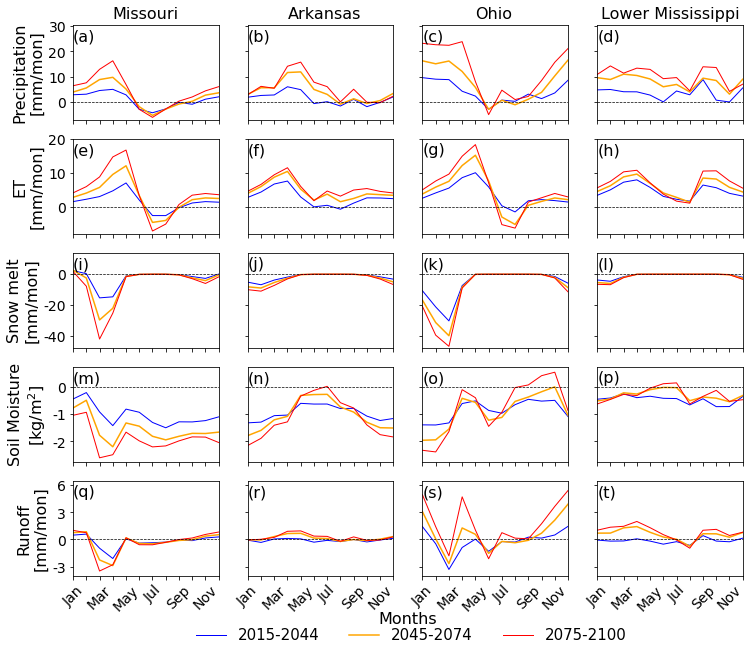

In [228]:

#%matplotlib notebook

tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16


linewidth = 0.8
dashLinewidth = 0.7
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig = plt.figure(figsize=(12, 11.25), constrained_layout=False)
axs = [plt.subplot(5, 4, x + 1,) for x in range(20)]
ax1 = axs[0]
ln112=ax1.plot(range(nMonsPerYr), precip_relCh_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln113=ax1.plot(range(nMonsPerYr), precip_relCh_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln114=ax1.plot(range(nMonsPerYr), precip_relCh_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)
ln115=ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)
ax1.set_title('(a)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax1.text(3, 33, r'Missouri', fontsize=titleFontSize)

ax1.set_xticks(range(nMonsPerYr))
ax1.set_xticklabels(monsStr, minor=False)
ax1.set_xticklabels('', )
ax1.set_xlim([0, 11])

ax1.set_ylim([-7, 30.5])

ax1.set_yticks([0, 10, 20, 30]) 
ax1.set_yticklabels(['0', '10', '20', '30'],  fontsize = tickFontSize) 
ax1.set_ylabel('Precipitation\n[mm/mon]', fontsize = textFontSize )

ax1.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ln122=ax2.plot(range(nMonsPerYr), precip_relCh_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln123=ax2.plot(range(nMonsPerYr), precip_relCh_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln124=ax2.plot(range(nMonsPerYr), precip_relCh_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ln125=ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax2.set_title('(b)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax2.text(3.05, 33, r'Arkansas', fontsize=titleFontSize)

ax2.set_xticks(range(nMonsPerYr))
ax2.set_xticklabels(monsStr, minor=False)
ax2.set_xticklabels('', )

ax2.set_yticks([0, 10, 20, 30]) 
ax2.set_yticklabels('', )

ax2.set_xlim([0, 11])
ax2.set_ylim([-7, 30.5])
ax2.set_xlabel('')
ax2.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax3 = axs[2]
ln132=ax3.plot(range(nMonsPerYr), precip_relCh_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln133=ax3.plot(range(nMonsPerYr), precip_relCh_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln134=ax3.plot(range(nMonsPerYr), precip_relCh_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ln135=ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax3.set_title('(c)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax3.text(4, 33, r'Ohio', fontsize=titleFontSize)

ax3.set_xticks(range(nMonsPerYr))
ax3.set_xticklabels(monsStr, minor=False)
ax3.set_xticklabels('', )

ax3.set_yticks([0, 10, 20, 30]) 
ax3.set_yticklabels('', )

ax3.set_xlim([0, 11])
ax3.set_ylim([-7, 30.5])
ax3.set_xlabel('')
ax3.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
ax4 = axs[3]
ln142=ax4.plot(range(nMonsPerYr), precip_relCh_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln143=ax4.plot(range(nMonsPerYr), precip_relCh_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln144=ax4.plot(range(nMonsPerYr), precip_relCh_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ln145=ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax4.set_title('(d)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax4.text(+0.3, 33, r'Lower Mississippi', fontsize=titleFontSize)

ax4.set_xticks(range(nMonsPerYr))
ax4.set_xticklabels(monsStr, minor=False)
ax4.set_xticklabels('', )

ax4.set_yticks([0, 10, 20, 30]) 
ax4.set_yticklabels('', )

ax4.set_xlim([0, 11])
ax4.set_ylim([-7, 30.5])
ax4.set_xlabel('')
ax4.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax5 = axs[4]
ln152=ax5.plot(range(nMonsPerYr), et_relCh_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln153=ax5.plot(range(nMonsPerYr), et_relCh_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln154=ax5.plot(range(nMonsPerYr), et_relCh_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)
ln155=ax5.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)
ax5.set_title('(e)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax5.set_xticks(range(nMonsPerYr))
ax5.set_xticklabels(monsStr, minor=False)
ax5.set_xticklabels('', )
ax5.set_xlim([0, 11])
ax5.set_ylim([-8, 20])

ax5.set_yticks([0, 10, 20]) 
ax5.set_yticklabels(['0', '10', '20'],  fontsize = tickFontSize) 
ax5.set_ylabel('ET\n[mm/mon]', fontsize = textFontSize )

ax5.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax6 = axs[5]
ln162=ax6.plot(range(nMonsPerYr), et_relCh_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln163=ax6.plot(range(nMonsPerYr), et_relCh_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln164=ax6.plot(range(nMonsPerYr), et_relCh_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ln165=ax6.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax6.set_title('(f)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax6.set_xticks(range(nMonsPerYr))
ax6.set_xticklabels(monsStr, minor=False)
ax6.set_xticklabels('', )

ax6.set_yticks([0, 10, 20]) 
ax6.set_yticklabels('', )

ax6.set_xlim([0, 11])
ax6.set_ylim([-8, 20])
ax6.set_xlabel('')
ax6.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax7 = axs[6]
ln172=ax7.plot(range(nMonsPerYr), et_relCh_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln173=ax7.plot(range(nMonsPerYr), et_relCh_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln174=ax7.plot(range(nMonsPerYr), et_relCh_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ln175=ax7.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax7.set_title('(g)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax7.set_xticks(range(nMonsPerYr))
ax7.set_xticklabels(monsStr, minor=False)
ax7.set_xticklabels('', )

ax7.set_yticks([0, 10, 20]) 
ax7.set_yticklabels('', )

ax7.set_xlim([0, 11])
ax7.set_ylim([-8, 20])
ax7.set_xlabel('')
ax7.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax8 = axs[7]
ln182=ax8.plot(range(nMonsPerYr), et_relCh_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln183=ax8.plot(range(nMonsPerYr), et_relCh_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln184=ax8.plot(range(nMonsPerYr), et_relCh_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ln185=ax8.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax8.set_title('(h)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax8.set_xticks(range(nMonsPerYr))
ax8.set_xticklabels(monsStr, minor=False)
ax8.set_xticklabels('', )

ax8.set_yticks([0, 10, 20]) 
ax8.set_yticklabels('', )

ax8.set_xlim([0, 11])
ax8.set_ylim([-8, 20])
ax8.set_xlabel('')
ax8.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax9 = axs[8]
ln192=ax9.plot(range(nMonsPerYr), snowMelt_relCh_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln193=ax9.plot(range(nMonsPerYr), snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln194=ax9.plot(range(nMonsPerYr), snowMelt_relCh_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)
ln195=ax9.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax9.set_title('(i)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax9.set_xticks(range(nMonsPerYr))
ax9.set_xticklabels(monsStr, minor=False)
ax9.set_xticklabels('', )
ax9.set_xlim([0, 11])
ax9.set_ylim([-48, 14])

ax9.set_yticks([0, -20, -40]) 
ax9.set_yticklabels(['0', '-20', '-40'],  fontsize = tickFontSize) 

ax9.set_ylabel('Snow melt\n[mm/mon]', fontsize = textFontSize )
ax9.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax10 = axs[9]
ln1102=ax10.plot(range(nMonsPerYr), snowMelt_relCh_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln1103=ax10.plot(range(nMonsPerYr), snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln1104=ax10.plot(range(nMonsPerYr), snowMelt_relCh_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ln1105=ax10.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax10.set_title('(j)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax10.set_xticks(range(nMonsPerYr))
ax10.set_xticklabels(monsStr, minor=False)
ax10.set_xticklabels('', )

ax10.set_yticks([0, -20, -40]) 
ax10.set_yticklabels('', )

ax10.set_xlim([0, 11])
ax10.set_ylim([-48, 14])
ax10.set_xlabel('')
ax10.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax11 = axs[10]
ln1112=ax11.plot(range(nMonsPerYr), snowMelt_relCh_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln1113=ax11.plot(range(nMonsPerYr), snowMelt_relCh_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln1114=ax11.plot(range(nMonsPerYr), snowMelt_relCh_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ln1115=ax11.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax11.set_title('(k)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax11.set_xticks(range(nMonsPerYr))
ax11.set_xticklabels(monsStr, minor=False)
ax11.set_xticklabels('', )
ax11.set_yticks([0, -20, -40]) 
ax11.set_yticklabels('', )

ax11.set_xlim([0, 11])
ax11.set_ylim([-48, 14])
ax11.set_xlabel('')
ax11.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax12 = axs[11]
ln1122=ax12.plot(range(nMonsPerYr), snowMelt_relCh_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln1123=ax12.plot(range(nMonsPerYr), snowMelt_relCh_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln1124=ax12.plot(range(nMonsPerYr), snowMelt_relCh_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ln1125=ax12.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax12.set_title('(l)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax12.set_xticks(range(nMonsPerYr))
ax12.set_xticklabels(monsStr, minor=False)
ax12.set_xticklabels('', )
ax12.set_yticks([0, -20, -40]) 
ax12.set_yticklabels('', )

ax12.set_xlim([0, 11])
ax12.set_ylim([-48, 14])
ax12.set_xlabel('')
ax12.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax13 = axs[12]
ln1132=ax13.plot(range(nMonsPerYr), soilMoist_relCh_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln1133=ax13.plot(range(nMonsPerYr), soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln1134=ax13.plot(range(nMonsPerYr), soilMoist_relCh_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)
ln1135=ax13.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax13.set_title('(m)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax13.set_xticks(range(nMonsPerYr))
ax13.set_xticklabels(monsStr, minor=False)
ax13.set_xticklabels('', )
ax13.set_xlim([0, 11])
ax13.set_ylim([-2.75, 0.75])

ax13.set_yticks([0, -1, -2]) 
ax13.set_yticklabels(['0', '-1', '-2'],  fontsize = tickFontSize) 

ax13.set_ylabel('Soil Moisture\n[kg/$\mathregular{m^{2}}$]', fontsize = textFontSize )

ax13.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax14 = axs[13]
ln1142=ax14.plot(range(nMonsPerYr), soilMoist_relCh_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln1143=ax14.plot(range(nMonsPerYr), soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln1144=ax14.plot(range(nMonsPerYr), soilMoist_relCh_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ln1145=ax14.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax14.set_title('(n)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax14.set_xticks(range(nMonsPerYr))
ax14.set_xticklabels(monsStr, minor=False)
ax14.set_xticklabels('', )

ax14.set_yticks([0, -1, -2]) 
ax14.set_yticklabels('', )

ax14.set_xlim([0, 11])
ax14.set_ylim([-2.75, 0.75])

ax14.set_xlabel('')
ax14.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax15 = axs[14]
ln1152=ax15.plot(range(nMonsPerYr), soilMoist_relCh_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln1153=ax15.plot(range(nMonsPerYr), soilMoist_relCh_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln1154=ax15.plot(range(nMonsPerYr), soilMoist_relCh_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ln1155=ax15.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax15.set_title('(o)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax15.set_xticks(range(nMonsPerYr))
ax15.set_xticklabels(monsStr, minor=False)
ax15.set_xticklabels('', )
ax15.set_yticks([0, -1, -2]) 
ax15.set_yticklabels('', )

ax15.set_xlim([0, 11])
ax15.set_ylim([-2.75, 0.75])
ax15.set_xlabel('')
ax15.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax16 = axs[15]
ln1162=ax16.plot(range(nMonsPerYr), soilMoist_relCh_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln1163=ax16.plot(range(nMonsPerYr), soilMoist_relCh_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln1164=ax16.plot(range(nMonsPerYr), soilMoist_relCh_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ln1165=ax16.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax16.set_title('(p)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax16.set_xticks(range(nMonsPerYr))
ax16.set_xticklabels(monsStr, minor=False)
ax16.set_xticklabels('', )
ax16.set_yticks([0, -1, -2]) 
ax16.set_yticklabels('', )

ax16.set_xlim([0, 11])
ax16.set_ylim([-2.75, 0.75])
ax16.set_xlabel('')
ax16.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax17 = axs[16]
ln1172=ax17.plot(range(nMonsPerYr), runoff_relCh_scenEraOne_ensMean_mon_clim_Missouri, label="2015-2044", color = 'blue', linewidth=1)
ln1173=ax17.plot(range(nMonsPerYr), runoff_relCh_scenEraTwo_ensMean_mon_clim_Missouri, label="2045-2074", color = 'orange', linewidth=1.5)
ln1174=ax17.plot(range(nMonsPerYr), runoff_relCh_scenEraThree_ensMean_mon_clim_Missouri, label="2075-2100", color = 'red', linewidth=1)
ln1175=ax17.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax17.set_title('(q)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax17.set_xticks(range(nMonsPerYr))
ax17.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = fontSize)
ax17.set_xlim([0, 11])
ax17.set_ylim([-4, 6.5])

ax17.set_yticks([-3, 0, 3, 6]) 
ax17.set_yticklabels(['-3', '0', '3', '6'],  fontsize = tickFontSize) 
ax17.set_ylabel('Runoff\n[mm/mon]', fontsize = textFontSize )
ax17.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax18 = axs[17]
ln1182=ax18.plot(range(nMonsPerYr), runoff_relCh_scenEraOne_ensMean_mon_clim_Arkansas, label="2015-2044", color = 'blue', linewidth=1)
ln1183=ax18.plot(range(nMonsPerYr), runoff_relCh_scenEraTwo_ensMean_mon_clim_Arkansas, label="2045-2074", color = 'orange', linewidth=1.5)
ln1184=ax18.plot(range(nMonsPerYr), runoff_relCh_scenEraThree_ensMean_mon_clim_Arkansas, label="2075-2100", color = 'red', linewidth=1)
ln1185=ax18.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax18.set_title('(r)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax18.set_xticks(range(nMonsPerYr))
ax18.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = tickFontSize)
ax18.set_yticks([-3, 0, 3, 6]) 
ax18.set_yticklabels('', )

ax18.set_xlim([0, 11])
ax18.set_ylim([-4, 6.5])
ax18.set_xlabel('Months', fontsize = textFontSize)
ax18.xaxis.set_label_coords(1.1, -0.38)

ax18.set_ylabel('')
ax18.legend(ncol=4, loc=(-0.4, -0.77),frameon=False, fontsize=legendFontSize)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax19 = axs[18]
ln1192=ax19.plot(range(nMonsPerYr), runoff_relCh_scenEraOne_ensMean_mon_clim_Ohio, label="2015-2044", color = 'blue', linewidth=1)
ln1193=ax19.plot(range(nMonsPerYr), runoff_relCh_scenEraTwo_ensMean_mon_clim_Ohio, label="2045-2074", color = 'orange', linewidth=1.5)
ln1194=ax19.plot(range(nMonsPerYr), runoff_relCh_scenEraThree_ensMean_mon_clim_Ohio, label="2075-2100", color = 'red', linewidth=1)
ln1195=ax19.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax19.set_title('(s)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax19.set_xticks(range(nMonsPerYr))
ax19.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = tickFontSize)

ax19.set_yticks([-3, 0, 3, 6]) 
ax19.set_yticklabels('', )

ax19.set_xlim([0, 11])
ax19.set_ylim([-4, 6.5])

ax19.set_xlabel('')
ax19.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax20 = axs[19]
ln1202=ax20.plot(range(nMonsPerYr), runoff_relCh_scenEraOne_ensMean_mon_clim_lowMissi, label="2015-2044", color = 'blue', linewidth=1)
ln1203=ax20.plot(range(nMonsPerYr), runoff_relCh_scenEraTwo_ensMean_mon_clim_lowMissi, label="2045-2074", color = 'orange', linewidth=1.5)
ln1204=ax20.plot(range(nMonsPerYr), runoff_relCh_scenEraThree_ensMean_mon_clim_lowMissi, label="2075-2100", color = 'red', linewidth=1)
ln1205=ax20.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=dashLinewidth)

ax20.set_title('(t)', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax20.set_xticks(range(nMonsPerYr))
ax20.set_xticklabels(monsStr1, minor=False, rotation = 45, fontsize = tickFontSize)
ax20.set_yticks([-3, 0, 3, 6]) 
ax20.set_yticklabels('', )

ax20.set_xlim([0, 11])
ax20.set_ylim([-4, 6.5])

ax20.set_xlabel('')
ax20.set_ylabel('')

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#st17 = fig.suptitle("Basin-average parameters", fontsize = 20)
#st17.set_y(0.94)
#st17.set_x(0.515)

plt.subplots_adjust(bottom=0.2)

plt.show()


#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\clim\paramGrClim.pdf')  
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\gr\clim\paramGrClim.png', dpi=600)  




## Statistics

In [229]:
print(soilMoist_refPeriod_ensMean_mon_clim_Missouri.max())
print(soilMoist_scenEraOne_ensMean_mon_clim_Missouri.max())
print(soilMoist_scenEraTwo_ensMean_mon_clim_Missouri.max())
print(soilMoist_scenEraThree_ensMean_mon_clim_Missouri.max())

34.6859998001395
33.7715742508881
33.228395866384474
32.78575872651824


In [230]:
print(soilMoist_refPeriod_ensMean_mon_clim_Arkansas.max())
print(soilMoist_scenEraOne_ensMean_mon_clim_Arkansas.max())
print(soilMoist_scenEraTwo_ensMean_mon_clim_Arkansas.max())
print(soilMoist_scenEraThree_ensMean_mon_clim_Arkansas.max())

print(soilMoist_refPeriod_ensMean_mon_clim_Arkansas.min())
print(soilMoist_scenEraOne_ensMean_mon_clim_Arkansas.min())
print(soilMoist_scenEraTwo_ensMean_mon_clim_Arkansas.min())
print(soilMoist_scenEraThree_ensMean_mon_clim_Arkansas.min())


30.935113608065944
29.645056088353385
29.340597823037054
29.046701393467075
18.00377680820889
17.21314127141458
17.269915683357805
17.429145377789464


In [231]:
print(soilMoist_refPeriod_ensMean_mon_clim_Ohio.max())
print(soilMoist_scenEraOne_ensMean_mon_clim_Ohio.max())
print(soilMoist_scenEraTwo_ensMean_mon_clim_Ohio.max())
print(soilMoist_scenEraThree_ensMean_mon_clim_Ohio.max())

43.17084506056044
41.7751042823509
41.22814832175926
40.781452170510576


In [232]:
print(soilMoist_refPeriod_ensMean_mon_clim_lowMissi.max())
print(soilMoist_scenEraOne_ensMean_mon_clim_lowMissi.max())
print(soilMoist_scenEraTwo_ensMean_mon_clim_lowMissi.max())
print(soilMoist_scenEraThree_ensMean_mon_clim_lowMissi.max())

37.22408808544704
36.77661645435151
36.71466251146225
36.62441695705875


In [233]:
print(runoff_refPeriod_ensMean_mon_clim_Missouri.max())
print(runoff_scenEraOne_ensMean_mon_clim_Missouri.max())
print(runoff_scenEraTwo_ensMean_mon_clim_Missouri.max())
print(runoff_scenEraThree_ensMean_mon_clim_Missouri.max())

9.768835599310565
8.80877025468577
7.506892242656027
6.830645635964956


In [234]:
print(runoff_refPeriod_ensMean_mon_clim_Arkansas.max())
print(runoff_scenEraOne_ensMean_mon_clim_Arkansas.max())
print(runoff_scenEraTwo_ensMean_mon_clim_Arkansas.max())
print(runoff_scenEraThree_ensMean_mon_clim_Arkansas.max())

8.641180749267733
8.715055736062238
9.322606540137144
9.59256905911501


In [235]:
print(runoff_refPeriod_ensMean_mon_clim_Ohio.max())
print(runoff_scenEraOne_ensMean_mon_clim_Ohio.max())
print(runoff_scenEraTwo_ensMean_mon_clim_Ohio.max())
print(runoff_scenEraThree_ensMean_mon_clim_Ohio.max())

40.549423587701405
37.23889092793579
37.88120753295516
38.74307258275796


In [236]:
print(runoff_refPeriod_ensMean_mon_clim_lowMissi.max())
print(runoff_scenEraOne_ensMean_mon_clim_lowMissi.max())
print(runoff_scenEraTwo_ensMean_mon_clim_lowMissi.max())
print(runoff_scenEraThree_ensMean_mon_clim_lowMissi.max())


13.591583539335764
13.66906300712034
15.01815690155749
15.586238683257742


In [237]:
STOP here ================

SyntaxError: invalid syntax (<ipython-input-237-56ef8df0f33a>, line 1)